# Домашне завдання №2: EDA

## Ольга Шапошник

# Імпорт необхідних бібліотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

d:\Programs\anaconda\envs\laba\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Імпорт даних

Зчитуємо дані.

In [3]:
df = pd.read_csv("../../../data/credit//application_data.csv.zip")

In [4]:
# Огляд декількох записів з датафрейму
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

# Перевірка структури даних

In [5]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

# Аналіз категоріальних змінних

In [8]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [10]:
number_df = df.select_dtypes(include="number")

In [11]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [12]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міcтять 106 `numerical` змінних

In [13]:
number_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.00,406597.50,24700.50,351000.00,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,1.00,2,2,10,0,0,0,0,0,0,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.01,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,0,270000.00,1293502.50,35698.50,1129500.00,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,2.00,1,1,11,0,0,0,0,0,0,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,0.07,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,0,67500.00,135000.00,6750.00,135000.00,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,1.00,2,2,9,0,0,0,0,0,0,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,0,135000.00,312682.50,29686.50,297000.00,0.01,-19005,-3039,-9833.00,-2437,NaN,1,1,0,1,0,0,2.00,2,2,17,0,0,0,0,0,0,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.00,513000.00,21865.50,513000.00,0.03,-19932,-3038,-4311.00,-3458,NaN,1,1,0,1,0,0,1.00,2,2,11,0,0,0,0,1,1,NaN,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [14]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [15]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [16]:
df.memory_usage().sum()/1024/1024

286.2270965576172

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [17]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [18]:
df[df.columns[flag_cols]].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [20]:
import numpy as np
from sys import getsizeof

In [21]:
getsizeof(np.int64(1))

32

In [22]:
getsizeof(np.int8(1))

25

In [23]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

In [24]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [25]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [26]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [27]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [28]:
df.memory_usage().sum()/1024/1024

228.74708938598633

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [29]:
df.isnull().values.any()

True

Порахуємо загальну кількість нульових значень в наборі даних

In [30]:
df.isnull().values.sum()

9152465

Сформуємо список із стовпців з нульовими значеннями

In [31]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [32]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [33]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [34]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [35]:
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
76,COMMONAREA_MEDI,214865,69.87
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
84,NONLIVINGAPARTMENTS_MEDI,213514,69.43
86,FONDKAPREMONT_MODE,210295,68.39
68,LIVINGAPARTMENTS_MODE,210199,68.35
54,LIVINGAPARTMENTS_AVG,210199,68.35
82,LIVINGAPARTMENTS_MEDI,210199,68.35


## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [36]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [37]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [38]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [39]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [40]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [41]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
28,OCCUPATION_TYPE,96391,31.35
43,EXT_SOURCE_3,60965,19.83
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
116,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
11,NAME_TYPE_SUITE,1292,0.42
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33


Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [42]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [43]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

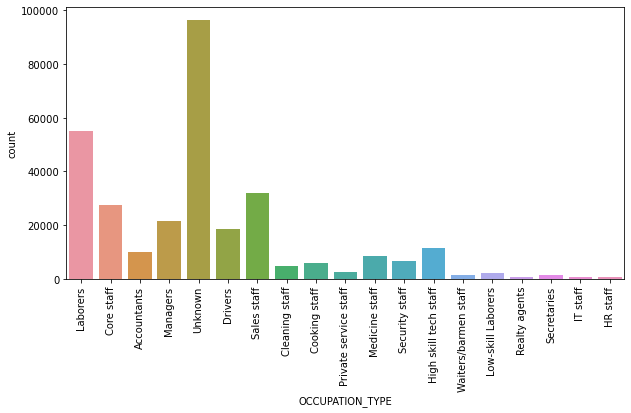

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [45]:
df.EXT_SOURCE_3.value_counts().head()

0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: EXT_SOURCE_3, dtype: int64

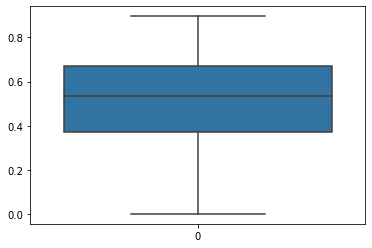

In [46]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [47]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [48]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [49]:
df.EXT_SOURCE_3.mean()

0.5108529061800121

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імплікації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імплікації. Якщо метод вимагає імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпліковані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [50]:
hw_cols = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK']
null_df_under40[null_df_under40.column_name.isin(hw_cols)]

,column_name,null_count,null_percentage
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50


In [51]:
# cереднє, моду, медіану та відсоток відсутніх даних для колонок:

def get_stats(data, column_name):
    mode = data[column_name].mode()
    mean = data[column_name].mean()
    median = data[column_name].median()
    percentile_75 = data[column_name].quantile(q = 0.75)

    print(f"Column {column_name} mode: {mode[0]}, mean: {mean:.3f}, median: {median}, percentile_75: {percentile_75:.3f}")
    print(data[column_name].value_counts(normalize=True, ascending=False).head()*100)
    data.boxplot(column_name)
    
    return mode[0], mean, median, percentile_75



Column AMT_REQ_CREDIT_BUREAU_YEAR mode: 0.0, mean: 1.900, median: 1.0, percentile_75: 3.000
0.00   26.99
1.00   23.84
2.00   18.87
3.00   12.64
4.00    7.79
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


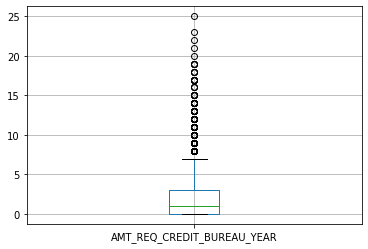

In [52]:
year = get_stats(df, 'AMT_REQ_CREDIT_BUREAU_YEAR')

## Висновки ДЗ1 AMT_REQ_CREDIT_BUREAU_YEAR
AMT_REQ_CREDIT_BUREAU_YEAR	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)


- Пропущених значень = 41519 або 13.50%
- Мода дорівнює 0
- середне значення = 1.9
- Медіана = 1
- Ми не маємо загально вираженої тенденції в даних, тому замінити дані якоюсь константою на основі статистики не виглядає як гарна ідея. Також якщо розглянути розподіл значень більш детальніше, та звернути увагу на найчастіше зустрічаємі значення (0, 1 та 2), можна побачити що вони мають доволі близьку % кількість зустрічань (27%, 24%, 19% відповідно). Тому в нас немає класу який домінує. 
- припущення: можливо також ми можемо заповнити пропуски "unknown" значенням, наприклад дуже великим 10000 чи відємним, аби ми знали що тут немає значення. бо виникає питання "чому ми маємо пропуски? проблеми з запитами в Бюро? чи якщо людина без попередніх кредитів, то воно завжди поржне і тоді ці пропуски теж інформативні?

**Висновок**
- На основі цього ми **залишаємо цей стобвець як є** аби пізніше застосувати більш склідні методи заповнення пропусків, або аби МЛ автоматично заповним пропуски самостіно


Column AMT_REQ_CREDIT_BUREAU_MON mode: 0.0, mean: 0.267, median: 0.0, percentile_75: 0.000
0.00   83.55
1.00   12.46
2.00    2.02
3.00    0.75
4.00    0.40
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


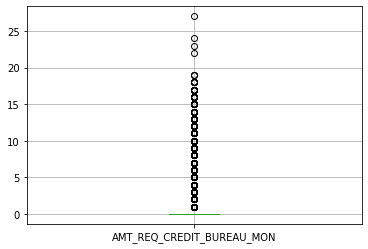

In [53]:
mon = get_stats(df, 'AMT_REQ_CREDIT_BUREAU_MON')

## Висновки ДЗ1 AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

- Пропущених значень = 41519 або 13.50%
- Мода дорівнює 0
- середне значення = 0.267
- Медіана = 0
- В цьому випадку ми маємо більш виражену закономірність в даних. Мода та медіана співпадають (0) та 75% наших даних також лежать нижче 0 (percentile_75=0) (насправді 83% даних належать значенню 0).
  - якщо нам дуже треба заповнити дані якимось значення, то використання 0 виглядає доречним, бо велика частина даних і так лежить в цьому діапазоні.
  - але те що наші пропущені дані займають аж 13%, то це може доволі сильно змістити наш розподіл
  - також ми досі маємо доволі суттєву частину даних яка має значення відміні від нуля (17%), та було б не правильно ігнорувати таку велику к-ть даних.
  - аби зробити висновок чи можемо ми заповнити значення 0 - треба провести більш ретельний аналіз: які залежності має наша поточна змінна з цільовою змінною, в яких випадках ми маємо пропуски...
  - також враховуєчи опис цього стовпця "Number of enquiries to Credit Bureau about the client one month before application" можна припустити що заповнення 0 все ж таки не призведе до втрати ціної інформації

**Висновок**
- На основі цього ми **залишаємо цей стобвець як є** аби МЛ автоматично заповним пропуски самостіно. **Або використати значення 0** (мода, медіана, майже середне значення)


Column AMT_REQ_CREDIT_BUREAU_WEEK mode: 0.0, mean: 0.034, median: 0.0, percentile_75: 0.000
0.00   96.79
1.00    3.09
2.00    0.07
3.00    0.02
4.00    0.01
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


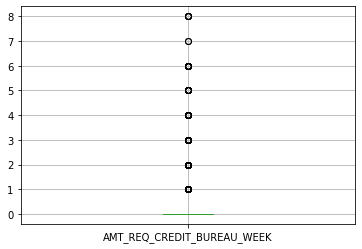

In [54]:
week = get_stats(df, 'AMT_REQ_CREDIT_BUREAU_WEEK')

## Висновки ДЗ1 AMT_REQ_CREDIT_BUREAU_WEEK

AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

- Пропущених значень = 41519 або 13.50%
- Мода дорівнює 0
- середне значення = 0.034
- Медіана = 0
- В цьому випадку ми маємо ще більш виражену закономірність в даних. Мода та медіана співпадають (0) також серене значення дуже мале та наближене до нуля (0.03) та 96% наших даних мають значення 0.
    - доволі доцільно звучить заповнити ці значення 0.
    - але аби зробити висновок чи можемо ми заповнити значення 0 - треба провести більш ретельний аналіз: які залежності має наша поточна змінна з цільовою змінною, в яких випадках ми маємо пропуски... бо через те що ми маємо аж 13% пропущених даних, дуже важливо не загубити залежності між даними, бо це може бути критично для надання кредитів.
    - було б також гарно отримати думку від доменого експернта, наскільки саме ця змінна є важливою 
    - думаю що використання більш складних алгоритім заповнння пропусків може бути доцільно тільки якщо є дуже вираженні залежності в рядках де наша змінна не нуль. Бо інакше через сильний перекос даних, алгоритм теж може навчитися заповнювати все нулями. 
    - також враховуєчи опис цього стовпця "Number of enquiries to Credit Bureau about the client one WEEK before application" заповнення нулями звучить логічно та не має призвксти до великих проблем

**Висновок**
- На основі цього ми **заповнюємо пропуски нулями** (мода, медіана, середне та 96% даних = 0)

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [55]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [56]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
11,NAME_TYPE_SUITE,1292,0.42
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
93,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
94,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
42,EXT_SOURCE_2,660,0.21
10,AMT_GOODS_PRICE,278,0.09


### Аналіз стовпця `NAME_TYPE_SUITE`

In [57]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

,column_name,null_count,null_percentage
11,NAME_TYPE_SUITE,1292,0.42


In [58]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

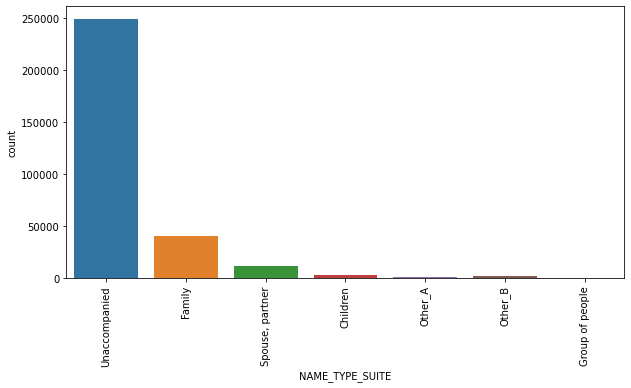

In [59]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [60]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [61]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

,column_name,null_count,null_percentage
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33


In [62]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

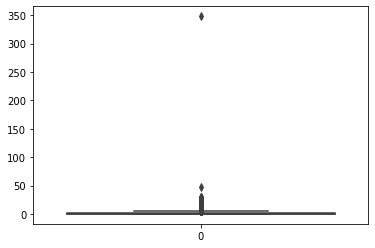

In [63]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [64]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [65]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [66]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імплікації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [67]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [68]:
hw2_cols = ['EXT_SOURCE_2', 'AMT_GOODS_PRICE']
null_df_under1[null_df_under1.column_name.isin(hw2_cols)]

,column_name,null_count,null_percentage
10,AMT_GOODS_PRICE,278,0.09
42,EXT_SOURCE_2,660,0.21


Column EXT_SOURCE_2 mode: 0.2858978721410488, mean: 0.514, median: 0.5659614260608526, percentile_75: 0.664
0.29   0.23
0.26   0.14
0.27   0.11
0.16   0.10
0.27   0.10
Name: EXT_SOURCE_2, dtype: float64


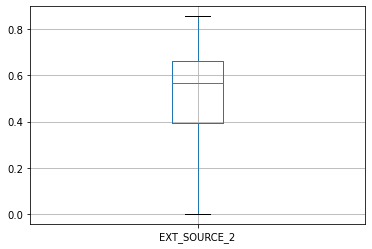

In [69]:
ext2 = get_stats(df, 'EXT_SOURCE_2')

## Висновки ДЗ2 EXT_SOURCE_2

EXT_SOURCE_2	Normalized score from external data source

- Пропущених значень = 660	або 0.21%
- Мода дорівнює 0.28
- середне значення = 0.514
- Медіана = 0.56
- Наша колонка означає Normalized score from external data source. Звучить логічно заповнити її або середнім або медіаною, бо це ніяк не має вплинути на наш розподіл даних (бо ми маємо дуже мало пропусків). Також ці значення лежать дуже близько один до одного (0.51 та 0.56). Але мода значно нижча за 75-перцентиль, через що ми можемо сказати що наші дані асиметричні.
    - Я б зупинилася на медіані бо ми бачимо на графіку розподілу, що наші дані трохи змішенні ближче до 1, тож медіана яка теж зміщення ближче до 1 буде краще.
    - заповнення модою  може сприченити зсув розподілу даних, чого б нам не хотілося
    - через те що дані незначною мірою асиметричні, а середнє значення чутливе до викидів - то заповнювати середнім значенням може бути не найоптимальнимим ріщенням, але прийнятним з урахуванням того що в нас тільки 0.21% пропусків

**Висновок**
- На основі цього ми **заповнюємо пропуски медіаною** (0.565)


In [70]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(), inplace=True)

In [71]:
# перевірка чи всі пропуски заповнені без помилок
print(f'К-ть пропущених значень: {df.EXT_SOURCE_2.isnull().sum()}')

К-ть пропущених значень: 0


Column AMT_GOODS_PRICE mode: 450000.0, mean: 538396.207, median: 450000.0, percentile_75: 679500.000
450000.00   8.47
225000.00   8.23
675000.00   8.12
900000.00   5.02
270000.00   3.72
Name: AMT_GOODS_PRICE, dtype: float64


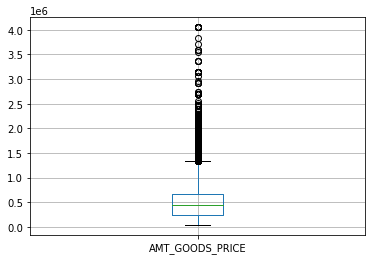

In [72]:
# HW2 part 2

atm_price = get_stats(df, 'AMT_GOODS_PRICE')

## Висновки ДЗ2 AMT_GOODS_PRICE
AMT_GOODS_PRICE	For consumer loans it is the price of the goods for which the loan is given

- Пропущених значень = 278 або 0.09%
- Мода дорівнює 450000
- середне значення = 538396.207
- Медіана = 450000.0
- Наша колонка означає the price of the goods for which the loan is given. В цьомку випадки ми маємо дуже багато значень виших за 75-перцентиль. Ми можемо сказати що дані асиметричні. Значення моди та медіанти співпадаєть, що може показувати що велика к-ть даних зосереджена разом. Також значення моди зустрічається у 8.5% випадків
    - тому в такому випадку найкращим варіантом буде заповнити пропуски медіаною.

**Висновок**
- На основі цього ми **заповнюємо пропуски медіаною\модою** (450000.0)

In [73]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

In [74]:
print(f'К-ть пропущених значень: {df.AMT_GOODS_PRICE.isnull().sum()}')

К-ть пропущених значень: 0


278	0.09%

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [75]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [76]:
df[df['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,1,1,0,207000.00,382500.00,19125.00,337500.00,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.02,-20232,-10044,-10024.00,-3537,1,1,1,1,1,0,Unknown,2.00,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.30,0.46,0.00,0.00,0.00,0.00,-286.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
38566,144669,0,Revolving loans,XNA,0,1,2,157500.00,270000.00,13500.00,225000.00,Family,Working,Secondary / secondary special,Married,House / apartment,0.03,-13717,-2797,-2241.00,-4659,1,1,1,1,1,0,Low-skill Laborers,4.00,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.71,0.31,0.00,0.00,0.00,0.00,-493.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,3.00,0.00,4.00
83382,196708,0,Revolving loans,XNA,0,1,1,135000.00,405000.00,20250.00,225000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.04,-10647,-1228,-183.00,-1671,1,1,1,1,1,0,Core staff,3.00,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.66,0.08,7.00,1.00,7.00,1.00,-851.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00
189640,319880,0,Revolving loans,XNA,1,1,0,247500.00,540000.00,27000.00,900000.00,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.04,-9649,-2293,-4099.00,-2326,1,1,1,1,1,0,Unknown,2.00,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.66,0.36,10.00,4.00,10.00,4.00,-1681.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,6.00


Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [77]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [78]:
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [79]:
df['DAYS_BIRTH'].value_counts().head()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: DAYS_BIRTH, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [80]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [81]:
df['DAYS_BIRTH'].nunique()

17460

In [82]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [83]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [84]:
df['DAYS_BIRTH'].value_counts()

13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24898     1
24868     1
8017      1
25098     1
25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [85]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [86]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [87]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
41982,148605,0,Revolving loans,M,0,1,0,450000.00,675000.00,33750.00,450000.00,NA,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.02,12396,-1161,-3265.00,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.70,NaN,3.00,0.00,3.00,0.00,-876.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,34
187348,317181,0,Revolving loans,F,0,1,0,202500.00,585000.00,29250.00,450000.00,NA,Commercial associate,Higher education,Unknown,House / apartment,0.03,12844,-232,-1597.00,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.65,0.67,1.00,0.00,1.00,0.00,-654.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,35


In [88]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: NAME_FAMILY_STATUS, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [89]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [90]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [91]:
df['DAYS_EMPLOYED'].value_counts().head()

 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: DAYS_EMPLOYED, dtype: int64

In [92]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: DAYS_EMPLOYED, Length: 12574, dtype: float64

In [93]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [94]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [95]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [96]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [97]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [98]:
df['DAYS_EMPLOYED'].value_counts().head()

365243    55374
200         156
224         152
230         151
199         151
Name: DAYS_EMPLOYED, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [99]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [100]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [101]:
df['DAYS_REGISTRATION'].value_counts().head()

-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: DAYS_REGISTRATION, dtype: int64

In [102]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: DAYS_REGISTRATION, dtype: float64

In [103]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [104]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [105]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [106]:
df['DAYS_REGISTRATION'].value_counts().head()

1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: DAYS_REGISTRATION, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [107]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [108]:
df['DAYS_ID_PUBLISH'].value_counts().head()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

In [109]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: DAYS_ID_PUBLISH, dtype: float64

In [110]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [111]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [112]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [113]:
df['DAYS_ID_PUBLISH'].value_counts().head()

4053    169
4095    162
4046    161
4417    159
4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [114]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [115]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [116]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [117]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [118]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [119]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [120]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [121]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [122]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [174]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column, size = 20):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(size,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='%1.1f%%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column, size = 20):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column, size)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column, size)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [124]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [125]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [126]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

0    215371
1     61119
2     26749
3      3717
4       429
Name: CNT_CHILDREN, dtype: int64

In [127]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: CNT_CHILDREN, dtype: float64

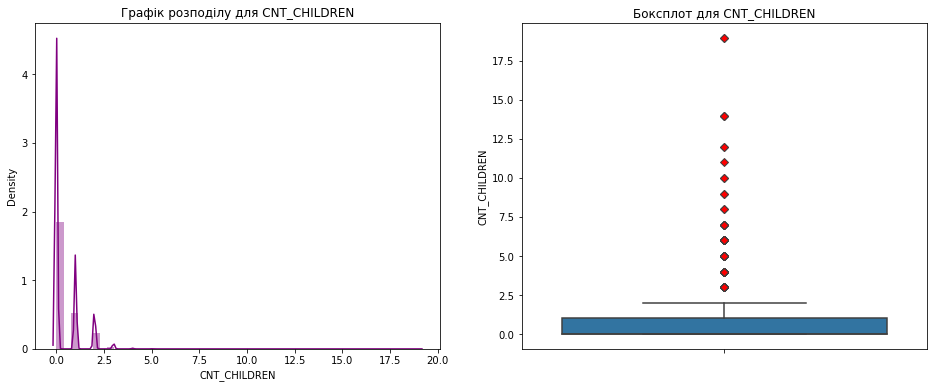

In [128]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [129]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [130]:

Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [131]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: AMT_INCOME_TOTAL, dtype: int64

In [132]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: AMT_INCOME_TOTAL, dtype: float64

In [133]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

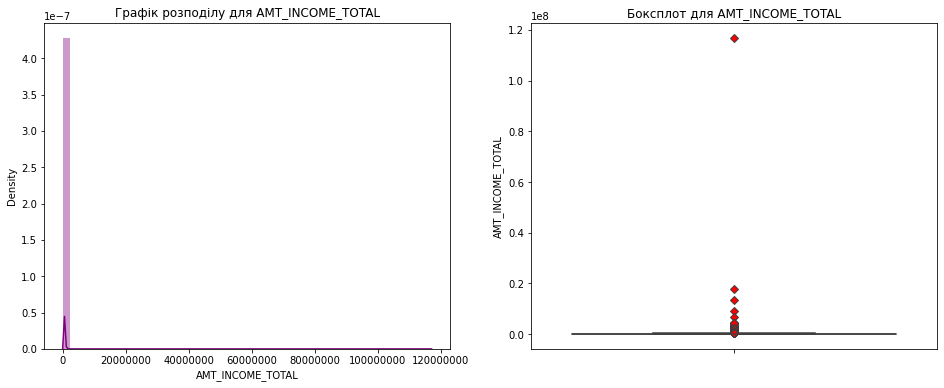

In [134]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

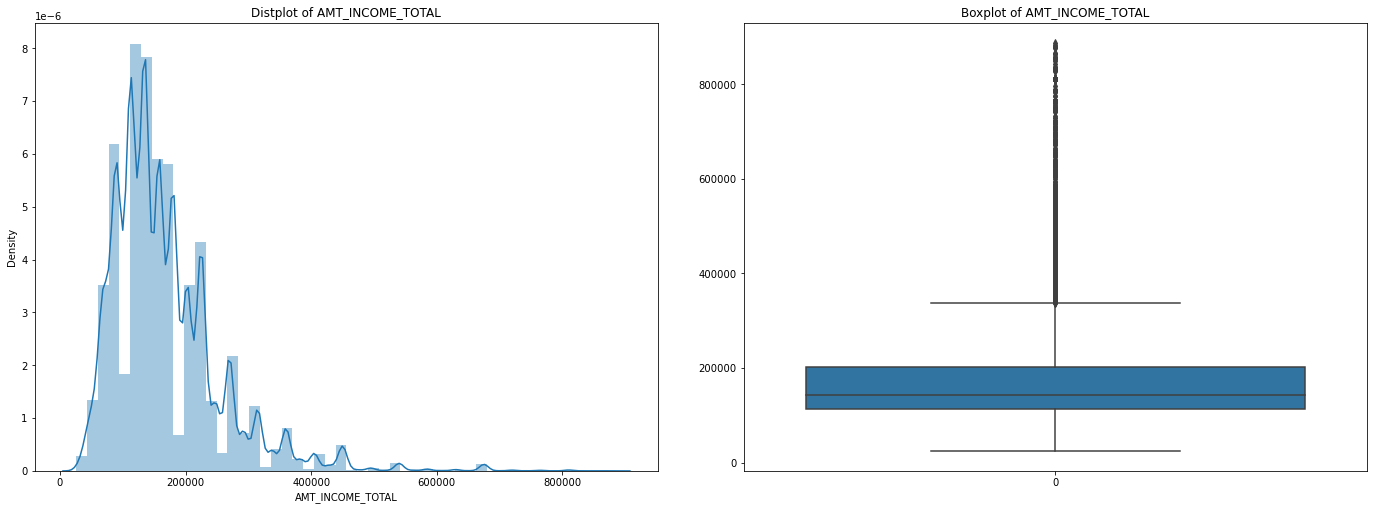

In [135]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [136]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1504,101769,0,Revolving loans,M,1,1,0,1080000.00,180000.00,9000.00,180000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.07,13633,5536,3.00,4971,1,1,0,1,0,0,Unknown,2.00,1,1,FRIDAY,13,0,1,1,0,0,0,Business Entity Type 3,0.65,0.46,0.00,0.00,0.00,0.00,491.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,37,15,0,14,1.00
1723,102015,0,Cash loans,F,0,1,0,1935000.00,269550.00,10534.50,225000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.01,18636,365243,3401.00,2168,1,0,0,1,1,0,Unknown,2.00,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.27,0.33,1.00,0.00,1.00,0.00,381.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,51,1001,9,6,1.00
3371,103938,0,Cash loans,F,0,0,1,1350000.00,2410380.00,109053.00,2250000.00,NA,Commercial associate,Higher education,Married,House / apartment,0.07,12213,843,757.00,4132,1,1,0,1,1,0,Managers,3.00,1,1,SUNDAY,13,0,1,1,0,0,0,Housing,0.72,0.57,0.00,0.00,0.00,0.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,3.00,0.00,0.00,33,2,2,11,0.00
4603,105384,0,Revolving loans,F,1,1,0,1350000.00,405000.00,20250.00,405000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.02,14781,4768,3469.00,4045,1,1,0,1,0,0,Managers,2.00,2,2,TUESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.66,0.73,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,40,13,10,11,0.00
5673,106637,0,Cash loans,M,1,1,3,967500.00,450000.00,30073.50,450000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.05,11901,546,2932.00,215,1,1,0,1,0,0,Managers,5.00,1,1,MONDAY,14,0,0,0,1,1,0,Business Entity Type 3,0.49,0.45,0.00,0.00,0.00,0.00,88.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,1.00,0.00,33,1,8,1,0.00


**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

In [137]:
def outlier_range(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    print(f"Максимальне значення, після якого існують викиди для {column}: {Max_value}")
    return Max_value

In [138]:
df.CNT_FAM_MEMBERS.value_counts().sort_values(ascending = False)

2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
12.00         2
20.00         2
16.00         2
13.00         1
15.00         1
11.00         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [139]:
max_val_cnt_fam = outlier_range(df, 'CNT_FAM_MEMBERS')


Максимальне значення, після якого існують викиди для CNT_FAM_MEMBERS: 4.5


In [140]:
# df[df['CNT_FAM_MEMBERS'] > 7].YEARS_BIRTH.value_counts().sum()
print(f'Кількість записів з більш ніж 7 членами сім\'ї: {df[df["CNT_FAM_MEMBERS"] > 6].shape[0]}')

# df[df['CNT_FAM_MEMBERS'] > max_val_cnt_fam].CNT_FAM_MEMBERS.value_counts().sum()
print(f'Кількість записів з більш ніж {max_val_cnt_fam} членами сім\'ї: {df[df["CNT_FAM_MEMBERS"] > max_val_cnt_fam].shape[0]}')

Кількість записів з більш ніж 7 членами сім'ї: 121
Кількість записів з більш ніж 4.5 членами сім'ї: 4007


In [141]:
df[df['CNT_FAM_MEMBERS'] > 7].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
3079,103596,0,Cash loans,M,0,1,7,85500.00,411813.00,17577.00,355500.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.01,17676,1065,2527.00,1206,1,1,0,1,0,0,Cleaning staff,9.00,2,2,FRIDAY,9,0,0,0,0,0,0,Housing,0.37,0.47,2.00,0.00,2.00,0.00,66.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,1.00,1.00,48,3,7,3,0.00
7204,108386,0,Cash loans,M,0,0,6,157500.00,566055.00,16551.00,472500.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.01,14946,1493,8560.00,4662,1,1,0,1,1,0,High skill tech staff,8.00,2,2,TUESDAY,17,1,0,1,1,1,0,Business Entity Type 3,0.74,0.49,0.00,0.00,0.00,0.00,2462.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,3.00,41,4,23,13,7.00
12615,114709,0,Cash loans,M,1,0,8,112500.00,755190.00,29947.50,675000.00,Unaccompanied,State servant,Higher education,Married,Municipal apartment,0.01,15197,6252,5009.00,5004,1,1,1,1,0,0,Core staff,10.00,2,2,WEDNESDAY,11,0,0,0,1,1,0,School,0.60,0.57,0.00,0.00,0.00,0.00,1049.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,42,17,14,14,3.00
17516,120426,0,Cash loans,M,1,1,6,315000.00,696150.00,29623.50,562500.00,Family,Working,Secondary / secondary special,Married,House / apartment,0.01,16376,2366,8714.00,4270,1,1,0,1,0,0,High skill tech staff,8.00,2,2,THURSDAY,15,0,0,0,0,1,1,Other,0.73,0.67,0.00,0.00,0.00,0.00,894.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,2.00,45,6,24,12,2.00
23881,127782,1,Cash loans,F,0,0,9,180000.00,640080.00,31131.00,450000.00,Unaccompanied,Commercial associate,Higher education,Single / not married,Municipal apartment,0.01,10929,1042,950.00,3447,1,1,1,1,0,0,Sales staff,10.00,2,2,THURSDAY,14,0,0,0,0,0,0,Self-employed,0.47,0.69,3.00,1.00,3.00,1.00,365.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,0.00,30,3,3,9,1.00


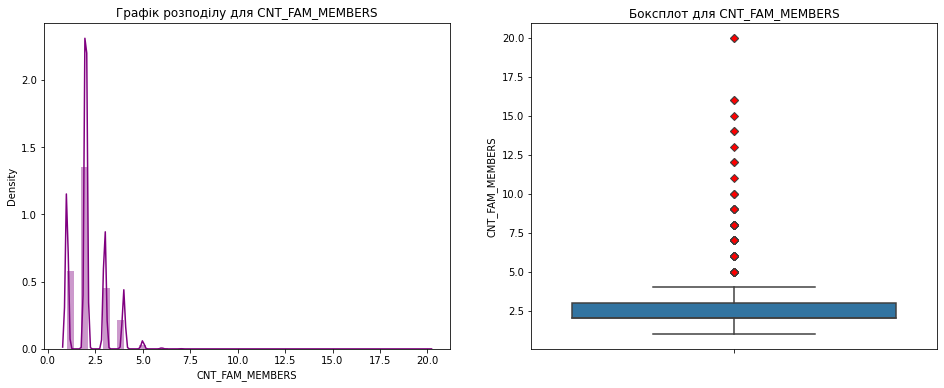

In [142]:
dist_box(df,'CNT_FAM_MEMBERS')

## Висновки ДЗ3 CNT_FAM_MEMBERS

- CNT_FAM_MEMBERS означає How many family members does client have.
- На основі статистики, ми можемо сказати, що викидами можна вважати значення більше за 4.5 (4007 осіб).
- Родин з кількістю членів більше за 6 є переважно люди старшої категорії та їх невелика кількість (121 особа) 
- Також ми маємо поодинокі випадки людей з родиною більше 10 членів.

**Висновок**
- Заявники, які мають **4 або більше членів родини є викидами**, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

In [143]:
df.AMT_ANNUITY.value_counts().sort_values(ascending = False).head()

9000.00     6385
13500.00    5514
6750.00     2279
10125.00    2035
37800.00    1602
Name: AMT_ANNUITY, dtype: int64

In [144]:
max_val_annuity = outlier_range(df, 'AMT_ANNUITY')

Максимальне значення, після якого існують викиди для AMT_ANNUITY: 61704.0


In [145]:
df.AMT_ANNUITY.describe(percentiles = [0.75,0.99, 0.999, 0.9999])

count    307499.00
mean      27108.57
std       14493.74
min        1615.50
50%       24903.00
75%       34596.00
99%       70006.50
99.9%    110047.50
99.99%   213291.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64

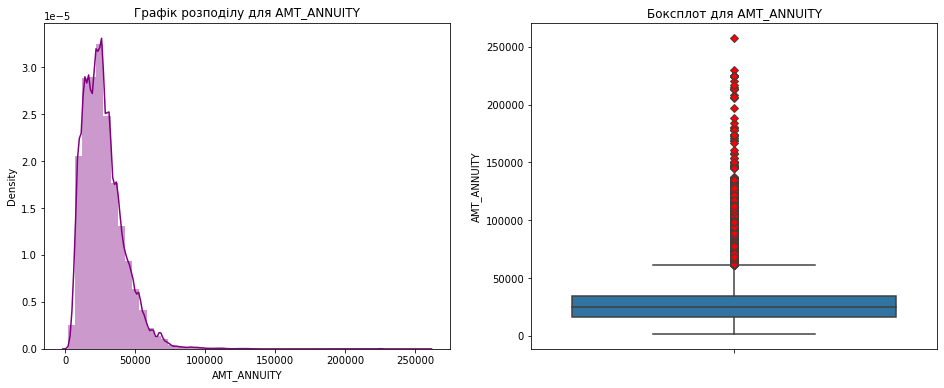

In [146]:
dist_box(df,'AMT_ANNUITY')

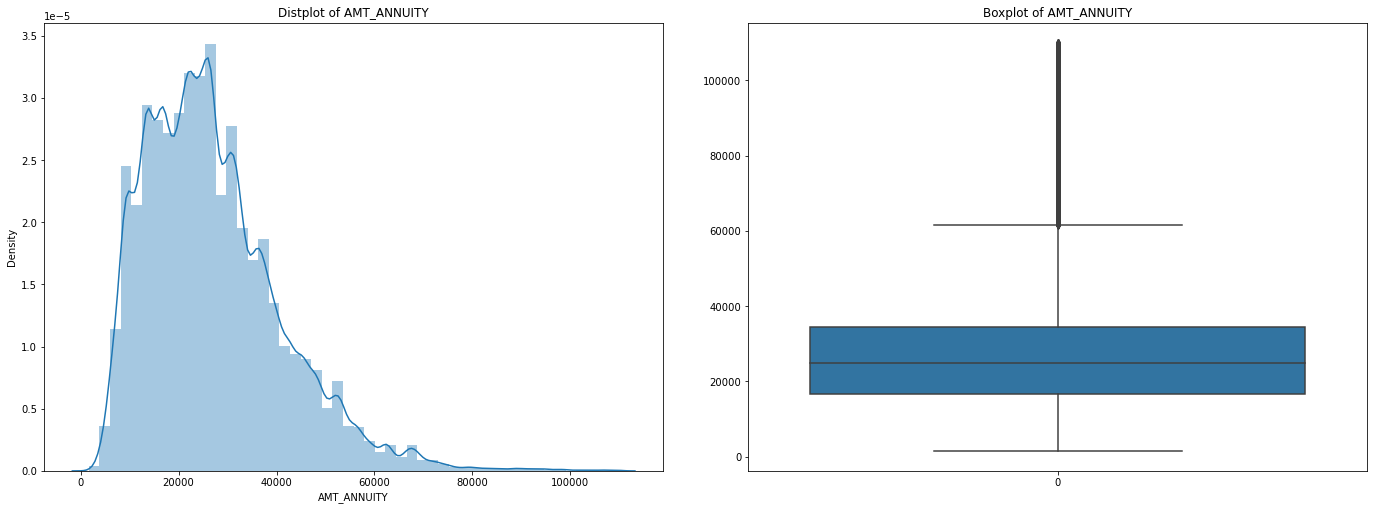

In [147]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] < 110047.50].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] < 110047.50].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

## Висновки ДЗ3 AMT_ANNUITY

- AMT_ANNUITY означає (Loan annuity) щомісячний платіж по кредиту.
- Статистика:
    - Середне значення = 27 108.57
    - Медіана  = 24 903.00
    - 99% персентиль =     70 006.50
    - 99.9% персентиль =  110 047.50
    - 99.99% персентиль = 213 291.00
- ми можемо вважати викидами значення від 61 704.0, які були доведені по статистичним розрахункам по міжквартельньому розмаху    
- На основі статистики ми можемо сказати, що значення яке перевизує 99.9% всіх щомісячних платежів (110 047.50) можна вважати викидом. Також ми можемо спостерігати за цим на гістограмі, правий хвіст якої різко наближається до нуля починаючи з 100к.
- Ми маємо право розглядати ці значення як викиди, бо значення вище них становлять лише 0.1% даних.
- Також якщо обрізати гістограму в межах 99.9%, то нащ розподіл стає більше схожим на нормальний та ми позбавилися вильної асиметрії.

**Висновок**
- тож місячний платіж який перевищує **110047.50 ми вважаємо викидами** 


# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [148]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: AMT_GOODS_PRICE, dtype: int64

In [149]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: AMT_GOODS_PRICE, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [150]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [151]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [152]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

very low     247251
low           56087
medium         4108
high             47
very high        18
Name: AMT_GOODS_PRICE_CATEGORY, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [153]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

39    9023
38    8793
37    8727
40    8602
41    8495
Name: YEARS_BIRTH, dtype: int64

In [154]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: YEARS_BIRTH, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [155]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [156]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [157]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: YEARS_BIRTH_CATEGORY, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [158]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

1     15661
2     15564
3     13894
13    12866
12    12697
Name: YEARS_REGISTRATION, dtype: int64

In [159]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: YEARS_REGISTRATION, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [160]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [161]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [162]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: YEARS_REGISTRATION_CATEGORY, dtype: int64

# Зберігання оновлених даних зі стисненням

In [163]:
filename = "../../../data/credit/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [164]:
df['TARGET'].value_counts().sort_values(ascending = False)

0    282686
1     24825
Name: TARGET, dtype: int64

In [165]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

0   91.93
1    8.07
Name: TARGET, dtype: float64

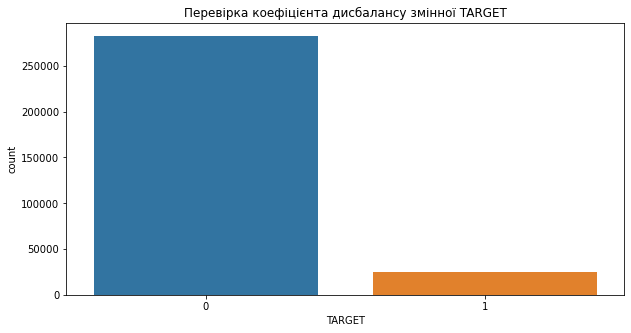

In [166]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [167]:
df1 = df[df['TARGET'] == 1]

In [168]:
df1.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [169]:
df0 = df[df['TARGET'] == 0]

In [170]:
df0.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

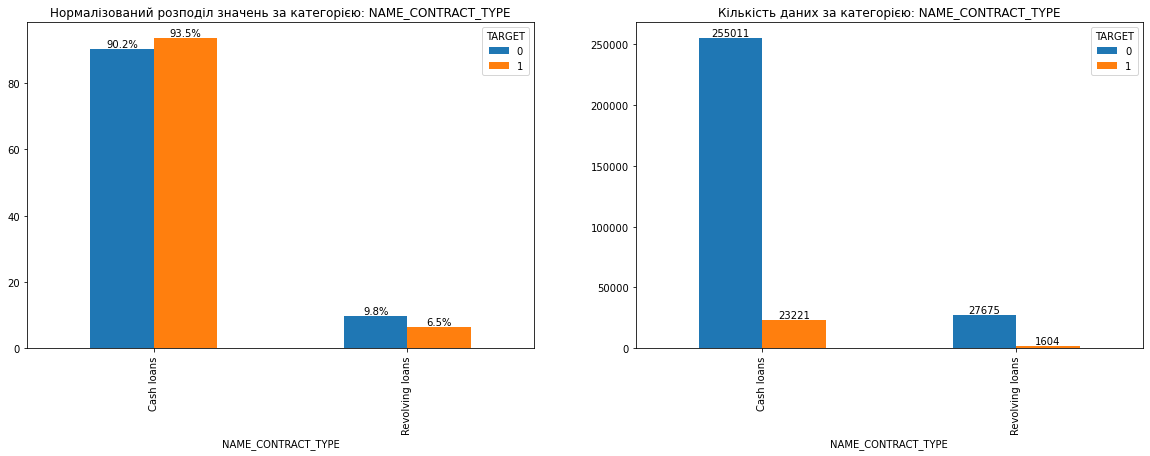

In [175]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

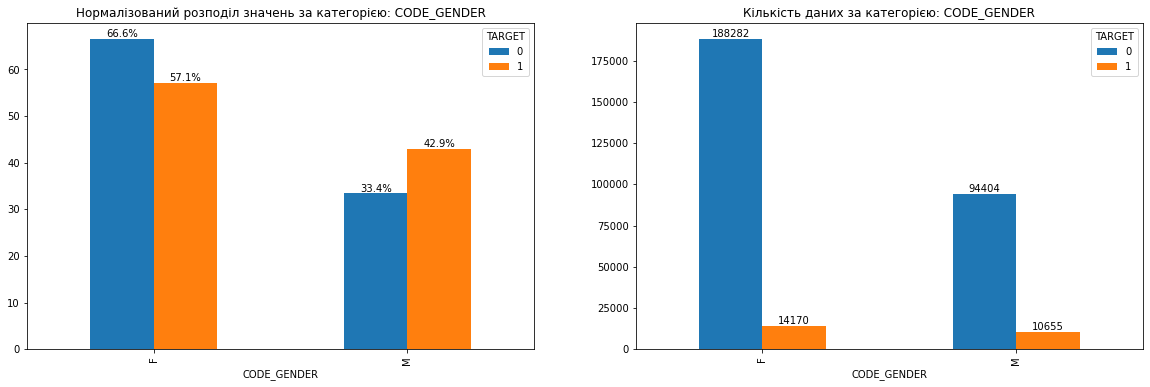

In [177]:
uni_cat_target_compare(df, 'CODE_GENDER')
# 1 - це клієнт, який має труднощі з оплатою 
# 0 - неиає тркуднощів з оплатою


## Висновки ДЗ4  CODE_GENDER

- На основі гістограми можна сказати, що є невеликі відміності між статтю та проблемою в оплаті кредита.
- Жінки складають 66% усіх позичальників, які повертають кредит вчасно. При тому жінки рідше (на 10%) не повертають кредит (57%)
- Чоловіки трохи частіше мають проблеми з поверненням кредиту ніж немають (43% проти 33%). 

**Висновок**
- Аналіз колонки `CODE_GENDER` змушує звернути увагу на те що чоловіки можуть мати більше проблем з поверненням кредиту ніж жінки

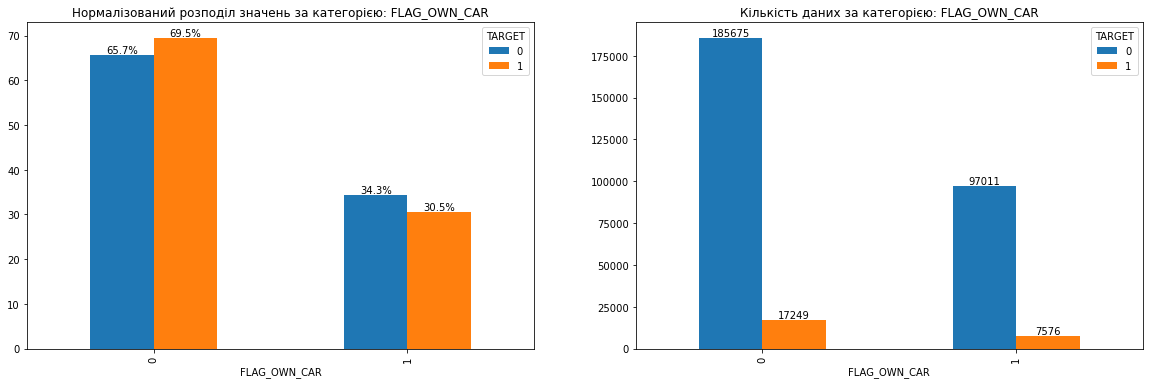

In [178]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')


## Висновки ДЗ4  FLAG_OWN_CAR

- Серед тих, хто вчасно повертає кредит 65.7% не мають автомобіля,, при тому що частка людей з проблемою виплат зростає в незначній мірі до 69.5%.
- Зворотня ситуація виникає з власниками автомоюілів (34% повертають, а 30% не повертають)

**Висновок**
- Аналіз колонки `FLAG_OWN_CAR` має вплив на повернення кредиту, та люди з машиною рідше мають проблеми (що може свідчити що наявність авто є маркером платеспроможності). Але різниця між двома категоріями не є сильно вираженою. Тому на даному етапі рано казати чи є авто важливою ознакою. Варто більше дослідити ці заледності

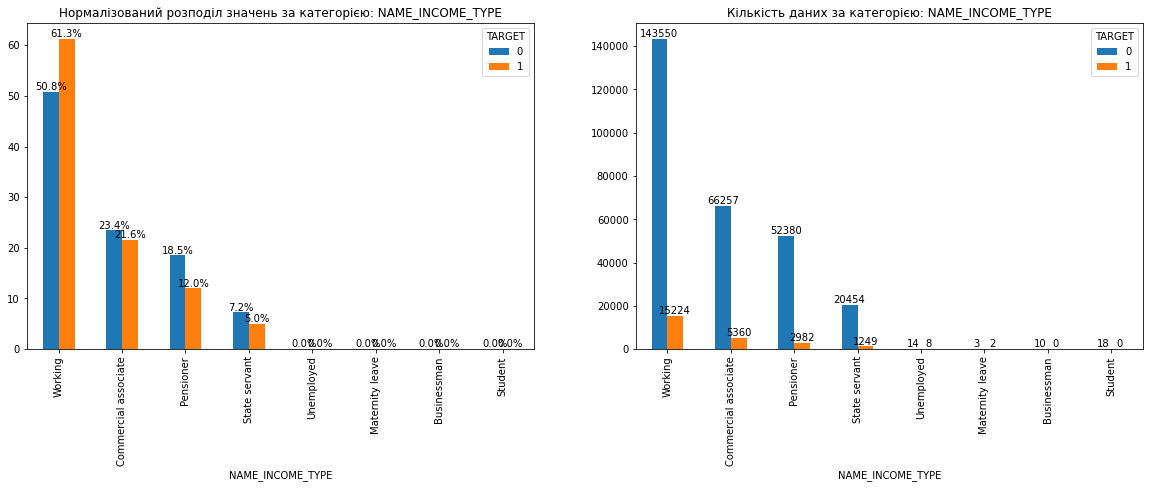

In [179]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')


## Висновки ДЗ4  NAME_INCOME_TYPE

- По гістограмі можна побачити що люди working tyрe частіше мають проблеми з поверненням кредиту ніж не мають (61% проти 51%). 
- Також для students та businessman кількість людей з проблемами поверненням кредиту = 0 

**Висновок**
- Аналіз колонки `NAME_INCOME_TYPE` підтвержив що має вплив на повернення кредиту. working групи частіше мають проблеми з поверненням кредиту

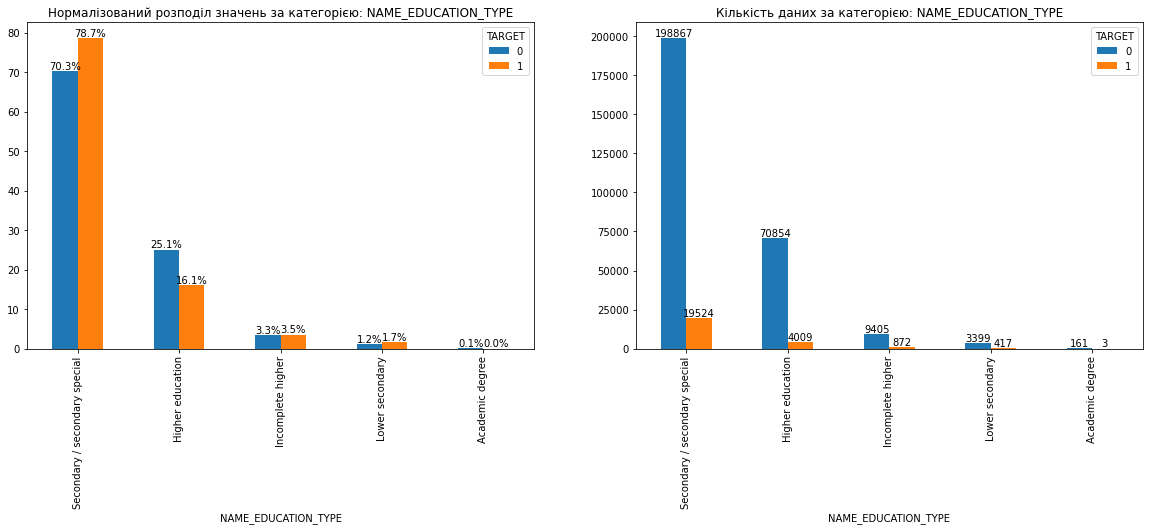

In [180]:
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')


## Висновки ДЗ4  NAME_EDUCATION_TYPE

- По гістограмі можна побачити що люди з secondary special частіше мають проблеми з поверненням кредиту ніж не мають (78% проти 70%). для Lower secondary спостерігається схожа тенденція  
- Також частка людей з академічною освітою + проблемами з виплатами менще ніж 0.1%

**Висновок**
- Аналіз колонки `NAME_EDUCATION_TYPE` підтвержив що має вплив на повернення кредиту. Люди з secondary special більш схильні до проблем з поверненням кредиту ніж інші групи

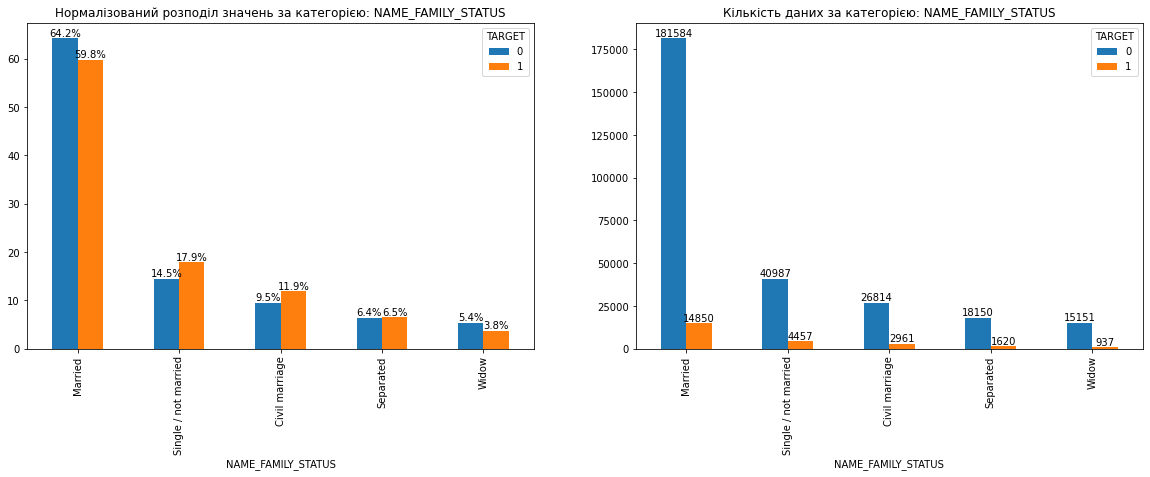

In [181]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

## Висновки ДЗ4  NAME_FAMILY_STATUS

- По гістограмі можна прослідкувати тенденцію, що люди без пари або ті які живуть в цивільному шлюбі частіше мають проблеми з погашенням кредиту ніж люди в офіціномк шлюбі
- Але різниця не є великою, тому треба додатковий аналіз наскільки вона значема

**Висновок**
- Аналіз колонки `NAME_FAMILY_STATUS` підтвержив що має вплив на повернення кредиту. Single/civil marriage групи частіше мають проблеми з поверненням кредиту

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [182]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [183]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [184]:
corr_df1.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.00,0.00,-0.00,0.03,-0.01,-0.03,-0.26,-0.19,-0.15,0.03,0.89,0.04,0.04,-0.02,-0.02,-0.02,-0.01,-0.00,0.05,0.05,-0.01,-0.02,0.03,0.00,0.03,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.02,-0.04,-0.26,-0.19,-0.15,0.03,-0.01
AMT_INCOME_TOTAL,NaN,0.00,1.00,0.04,0.05,0.04,0.01,-0.00,-0.01,-0.00,0.00,0.01,-0.02,-0.02,0.01,0.01,0.01,0.01,-0.00,-0.00,-0.00,0.01,-0.02,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,0.00
AMT_CREDIT,NaN,-0.00,0.04,1.00,0.75,0.98,0.07,0.14,0.00,0.03,0.05,0.05,-0.06,-0.07,0.03,0.02,0.03,0.03,-0.03,-0.04,-0.02,0.12,0.08,0.02,-0.03,0.02,-0.03,0.11,-0.01,0.00,0.01,0.06,-0.02,-0.04,0.14,0.00,0.03,0.05,0.11
AMT_ANNUITY,NaN,0.03,0.05,0.75,1.00,0.75,0.07,0.01,-0.08,-0.03,0.02,0.08,-0.07,-0.09,0.03,0.03,0.07,0.06,-0.01,0.00,0.01,0.12,0.04,0.01,-0.02,0.01,-0.03,0.08,0.01,-0.00,0.03,0.05,-0.01,-0.01,0.01,-0.08,-0.03,0.02,0.08


Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

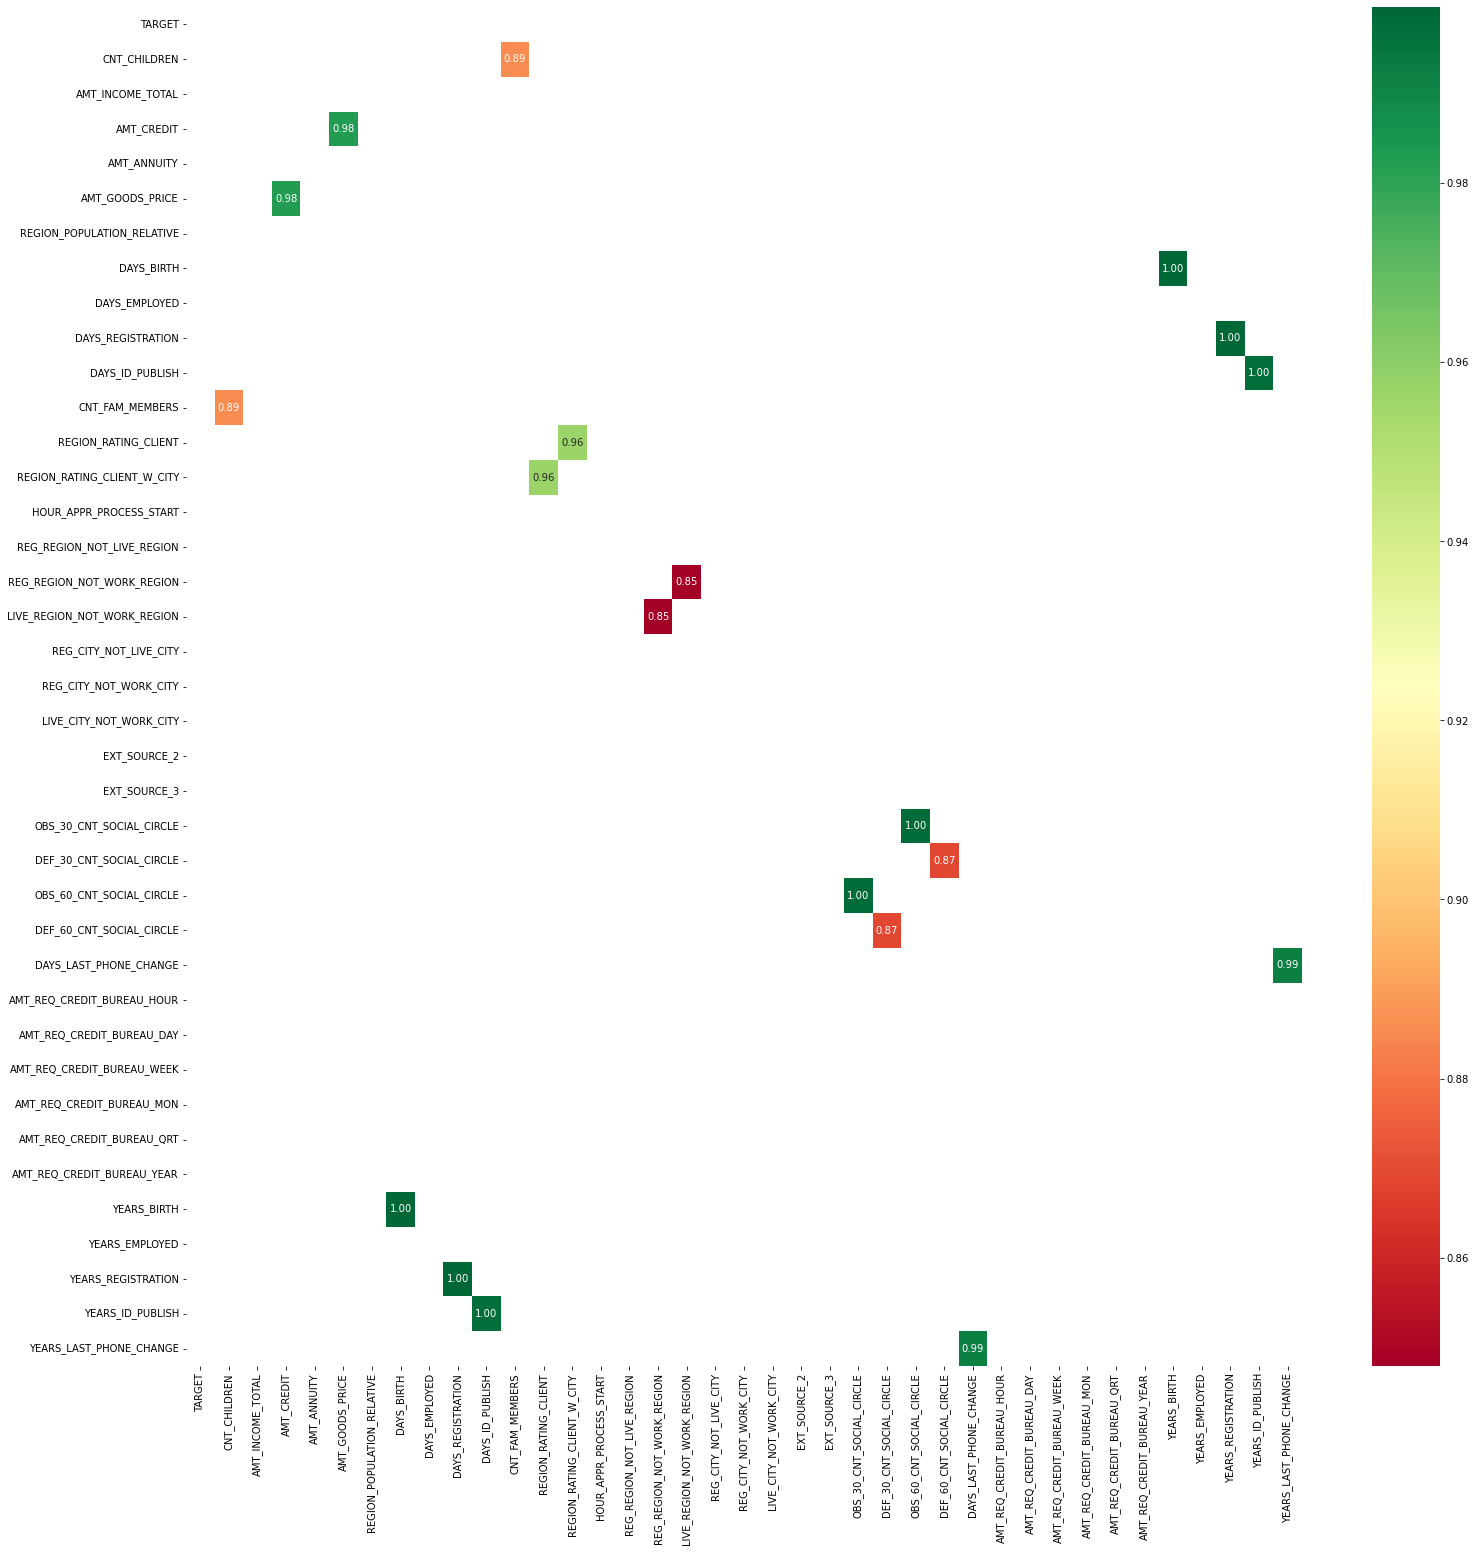

In [185]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [186]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [187]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [188]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [189]:
corr_df0.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.00,0.03,0.00,0.02,-0.00,-0.02,-0.34,-0.25,-0.19,0.03,0.88,0.02,0.02,-0.01,-0.01,0.01,0.02,0.02,0.07,0.07,-0.02,-0.04,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.00,-0.00,-0.01,-0.01,-0.04,-0.34,-0.25,-0.19,0.03,0.01
AMT_INCOME_TOTAL,NaN,0.03,1.00,0.34,0.42,0.35,0.17,-0.06,-0.14,-0.06,-0.02,0.03,-0.19,-0.20,0.08,0.07,0.14,0.13,0.01,0.02,0.02,0.14,-0.07,-0.03,-0.03,-0.03,-0.03,0.04,0.00,0.01,0.01,0.06,0.01,0.03,-0.06,-0.14,-0.06,-0.02,0.04
AMT_CREDIT,NaN,0.00,0.34,1.00,0.77,0.99,0.10,0.05,-0.07,-0.01,0.00,0.06,-0.10,-0.11,0.05,0.02,0.05,0.05,-0.03,-0.02,0.00,0.13,0.04,-0.00,-0.02,-0.00,-0.02,0.07,-0.00,0.00,-0.00,0.05,0.02,-0.05,0.05,-0.07,-0.01,0.00,0.07
AMT_ANNUITY,NaN,0.02,0.42,0.77,1.00,0.78,0.12,-0.01,-0.10,-0.04,-0.01,0.08,-0.13,-0.15,0.05,0.04,0.08,0.08,-0.01,0.00,0.01,0.13,0.03,-0.01,-0.02,-0.01,-0.02,0.06,0.00,0.00,0.01,0.04,0.01,-0.01,-0.01,-0.10,-0.04,-0.01,0.06


Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

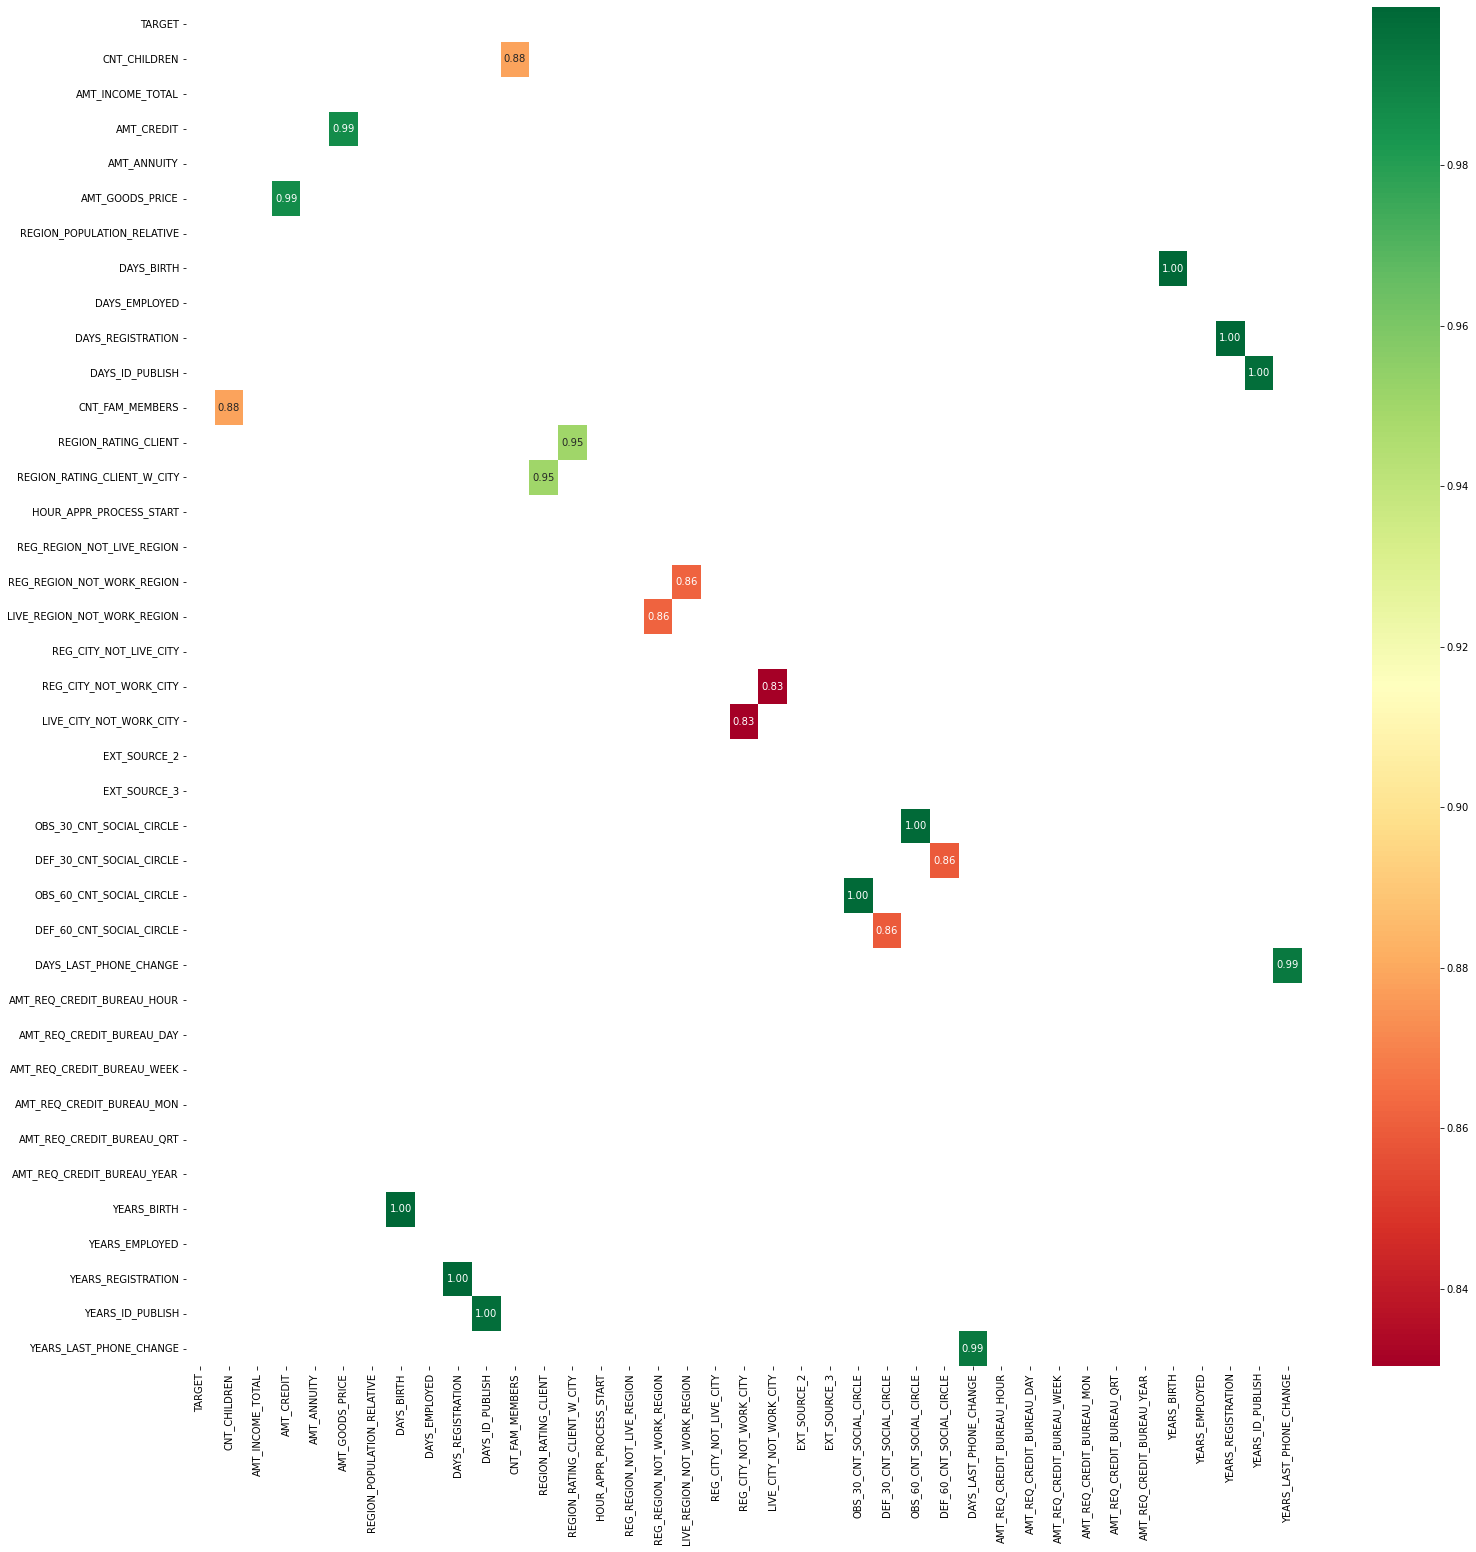

In [190]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [191]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [192]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [193]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [194]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [195]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [196]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.title(f'KDE plot for {column} W/O Outliers')
  plt.show()

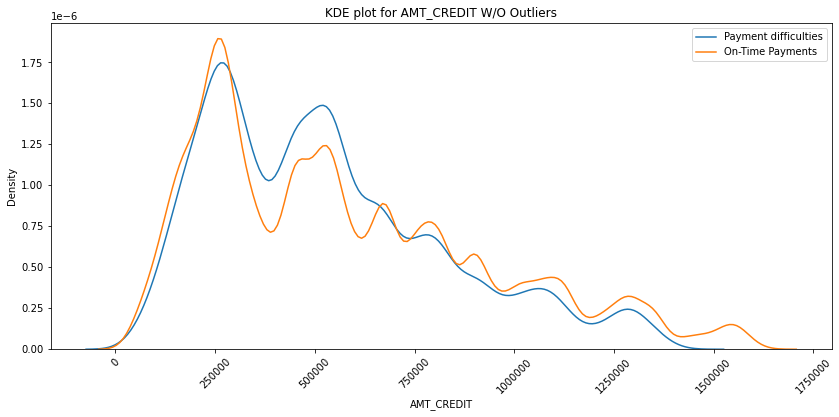

In [197]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

In [198]:
def kde_full(df0, df1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[column],label = 'Payment difficulties')
  sns.kdeplot(df0[column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.title(f'KDE plot for {column} with Outliers')
  plt.legend()
  plt.show()

In [199]:
def outlier_analisys(df0, df1, column):
    
    max_v0 = outlier_range(df0, column)
    max_v1 = outlier_range(df1, column)

    if max_v0 > df0[column].max():
        print('No Outliers in df0')
    if max_v1 > df1[column].max():
        print('No Outliers in df1')

    kde_full(df0, df1, column)
    kde_no_outliers(df0, df1, max_v0, max_v1, column)    
    return max_v0, max_v1    

Максимальне значення, після якого існують викиди для YEARS_BIRTH: 84.0
Максимальне значення, після якого існують викиди для YEARS_BIRTH: 76.0
No Outliers in df0
No Outliers in df1


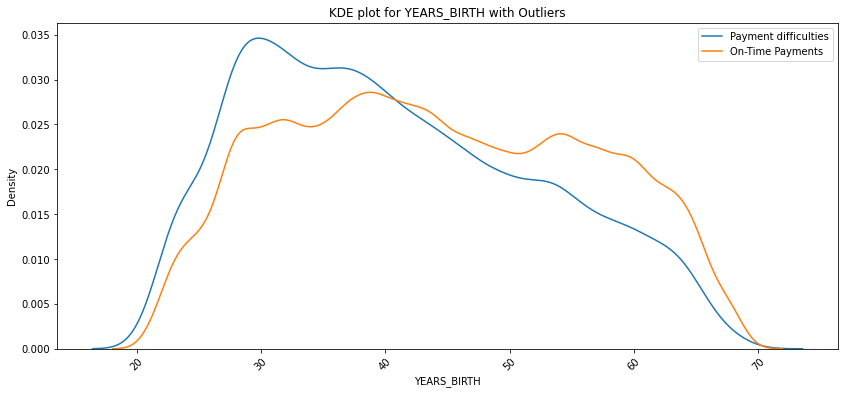

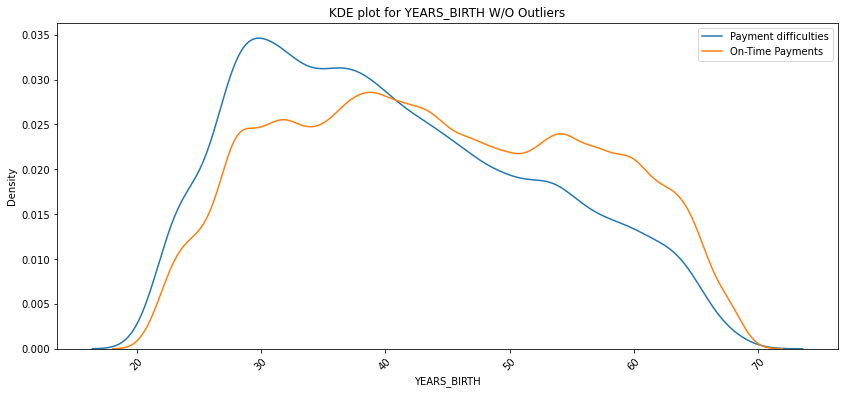

In [200]:
max_birth_v0, max_birth_v1 = outlier_analisys(df0, df1, 'YEARS_BIRTH')

## Висновки ДЗ5  NAME_FAMILY_STATUS

- У віковій групі 20-40 років видно більшу щільність людей які мають проблеми зі сплатою кредиту
- зворотня ситуація для групи 50-60, які частяше не мають ніяких складностей по сплаті


Максимальне значення, після якого існують викиди для AMT_GOODS_PRICE: 1354755.9375
Максимальне значення, після якого існують викиди для AMT_GOODS_PRICE: 1329750.0


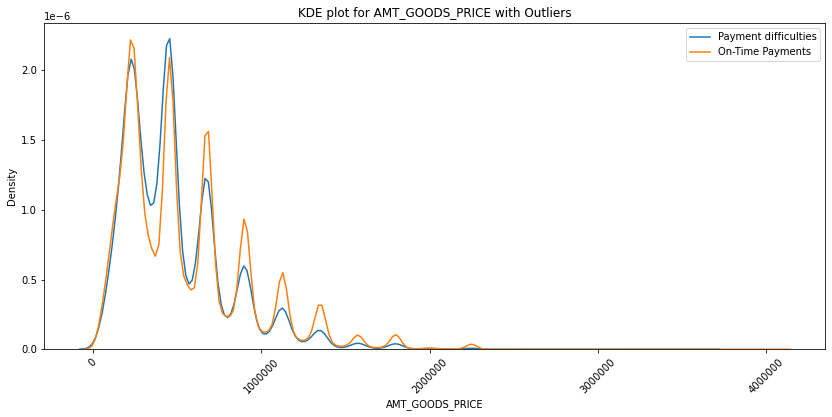

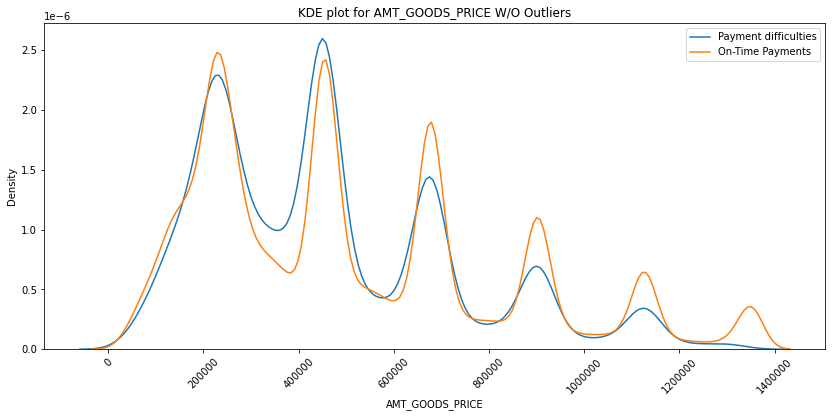

In [201]:
max_birth_v0, max_birth_v1 = outlier_analisys(df0, df1, 'AMT_GOODS_PRICE')

## Висновки ДЗ5  AMT_GOODS_PRICE

- Графік має одкову частоту піків для обох категорії.
- На дешеві товари (до 200к) частота між категоріями майже однакова.
- Між двома піками (200к - 500к) люди трохи частіше мають проблеми з погащенням кредиту.
- А при збільшені ціни - збільшується частка людей які платять вчасно за кредит.
    - але подібний  тренд спостерігається тільки на пікових значеннях, для "впадин між піками" дві категорії вирівнюються по частоті

Максимальне значення, після якого існують викиди для DAYS_EMPLOYED: 13734.5
Максимальне значення, після якого існують викиди для DAYS_EMPLOYED: 7184.5


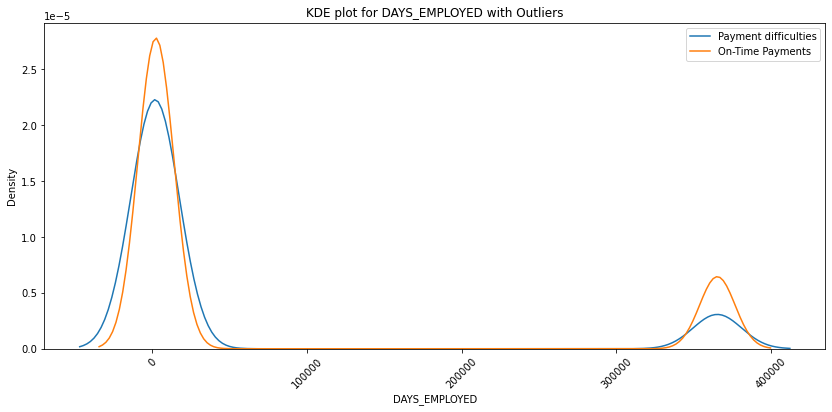

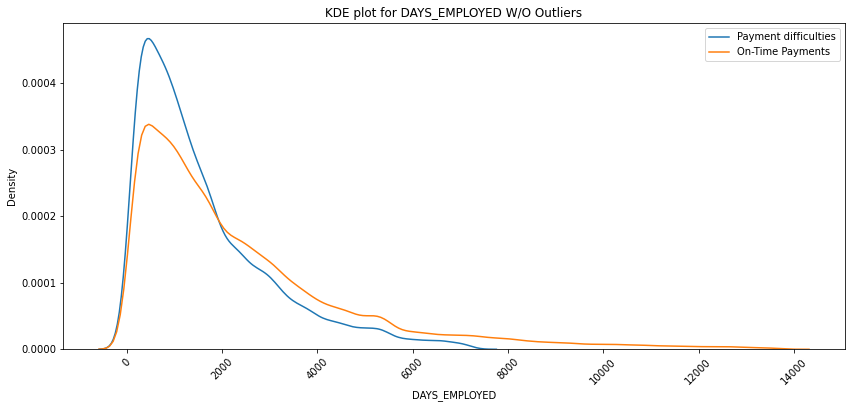

In [202]:
max_birth_v0, max_birth_v1 = outlier_analisys(df0, df1, 'DAYS_EMPLOYED')

## Висновки ДЗ5  DAYS_EMPLOYED

- даний графік підтверджує що люди які працюють на робочому місці МЕНШЕ 2000 днів мають чатсіше проблеми по платі кредиту
- при тому зі збільшенням к-ті днів роботи, частка людей які НЕ мають проблеми зростає.

- Також графік з викидами, показує додаткові піки біля 400к днів (що ми виявли на попередніх етапах, що це пенсіонери або непрацюючі люди), але ми бачимо що в тій групі людей які повертають вчасно кредит - більше

Максимальне значення, після якого існують викиди для CNT_CHILDREN: 2.5
Максимальне значення, після якого існують викиди для CNT_CHILDREN: 2.5


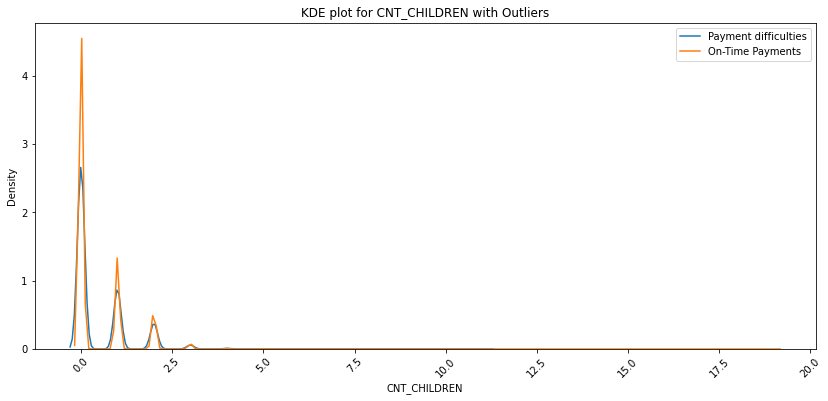

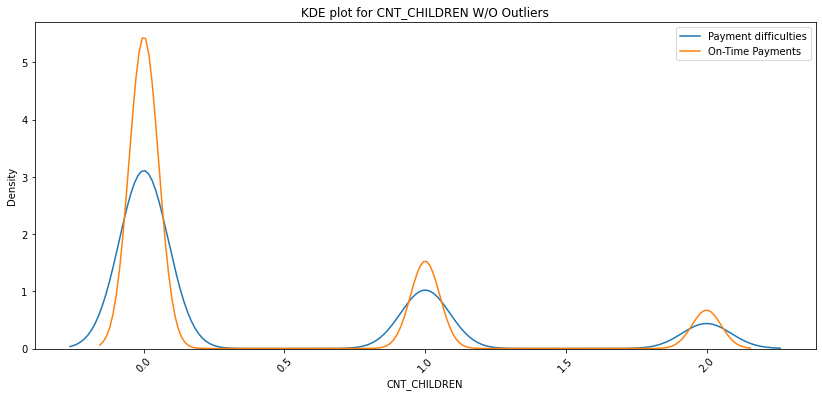

In [203]:
max_birth_v0, max_birth_v1 = outlier_analisys(df0, df1, 'CNT_CHILDREN')

## Висновки ДЗ5  CNT_CHILDREN

- Можемо побачити, що бездітні позичальники частіше виплачують кредити вчасно.
- Тоді як різниця в амплітуді між піками зменшується зі збішенням к-ті дітей. Коли позичальник має дві дитини, то частота проблем зі сплатою та їх відсутністю близько одна до одного, але частіше люди сплачують вчасно

Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0
Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0


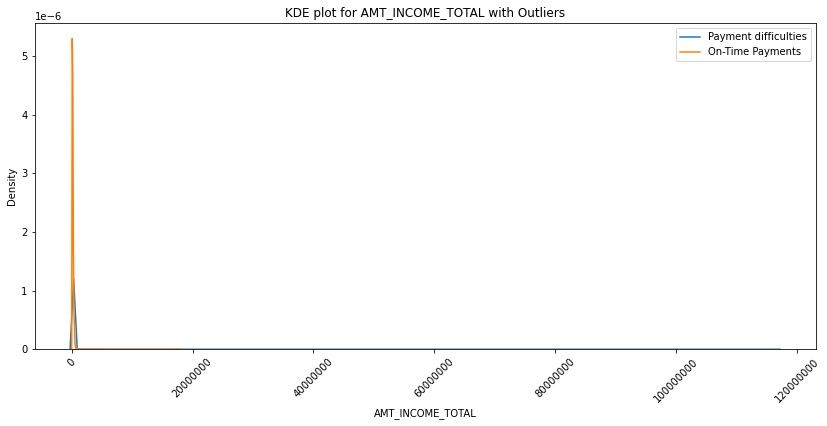

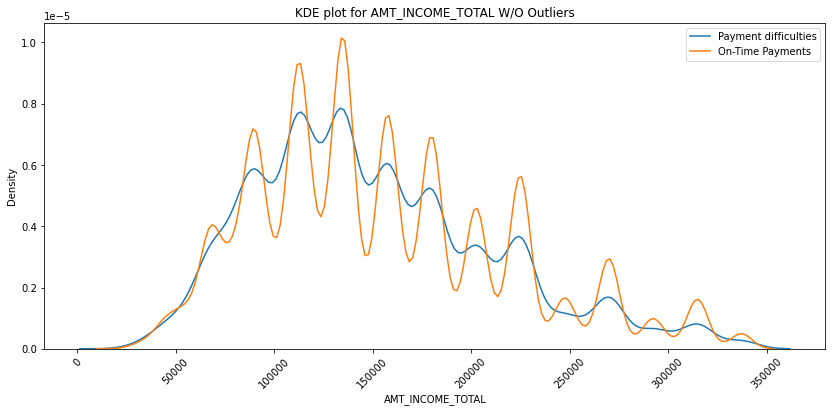

In [204]:
max_birth_v0, max_birth_v1 = outlier_analisys(df0, df1, 'AMT_INCOME_TOTAL')

## Висновки ДЗ5  AMT_INCOME_TOTAL

- Більшість позичальників мають дохід від 75к до 200к.
- Люди які оплячують кредит вчасно мають більш різкий патерн поведінки графіка (їх цильність більша в пікових точках), а той час коли коли з проблемаю в оплаті мають більш плавний графік.
- також можна помітити, що на кожному піку (70к, 90к, 110к, 140к, 160к, 190к, 200к, 220к, 250к, 270к, 310к) кількість людей які вчасно погашають кредит більша.
- але при тому на кожному проваллі між піками кількість людей з проблемами по кредиту значно зростає
- також при невеликих сумах доходу (до 60к) дві категорії мають однакову поведінку

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [205]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

Максимальне значення, після якого існують викиди для AMT_GOODS_PRICE: 1329750.0


1329750.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [206]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

Максимальне значення, після якого існують викиди для AMT_CREDIT: 1406688.75


1406688.75

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [207]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

Максимальне значення, після якого існують викиди для AMT_GOODS_PRICE: 1354755.9375


1354755.9375

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [208]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

Максимальне значення, після якого існують викиди для AMT_CREDIT: 1620000.0


1620000.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

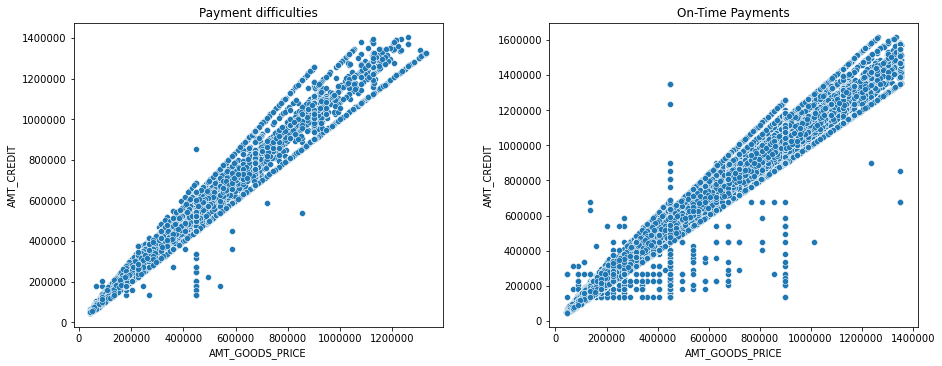

In [209]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

In [210]:
def numerical_val_analisys(df0, df1, column1, column2, corr_df0, corr_df1):
    max_value1_col1 = outlier_range(df1,column1)
    max_value1_col2 = outlier_range(df1,column2)
    print('\nPeople with payment difficulties')
    print(f'Outlier treshold for: {column1} max value: {max_value1_col1}, {column2} max value: {max_value1_col2}\n')

    max_value0_col1 = outlier_range(df0,column1)
    max_value0_col2 = outlier_range(df0,column2)
    print('\nPeople with on-time payments')
    print(f'Outlier treshold for: {column1} max value: {max_value0_col1}, {column2} max value: {max_value0_col2}\n')

    print(f"Correlation between AMT_ANNUITY and AMT_CREDIT df0:{corr_df0.loc[column1, column2]}")
    print(f"Correlation between AMT_ANNUITY and AMT_CREDIT df1:{corr_df1.loc[column1, column2]}")

    plt.figure(figsize = (14, 6))

    plt.subplot(1,2,1)
    plt.title('Payment difficulties')
    sns.scatterplot(x = df1[df1[column1] < max_value1_col1][column1],
                    y = df1[df1[column2] < max_value1_col2][column2], data = df1)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

    plt.subplot(1,2,2)
    plt.title('On-Time Payments')
    sns.scatterplot(x = df0[df0[column1] < max_value0_col1][column1],
                    y = df0[df0[column2] < max_value0_col2][column2], data = df0)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

    plt.tight_layout(pad = 4)
    plt.show()


Максимальне значення, після якого існують викиди для AMT_ANNUITY: 56398.5
Максимальне значення, після якого існують викиди для AMT_CREDIT: 1406688.75

People with payment difficulties
Outlier treshold for: AMT_ANNUITY max value: 56398.5, AMT_CREDIT max value: 1406688.75

Максимальне значення, після якого існують викиди для AMT_ANNUITY: 62187.75
Максимальне значення, після якого існують викиди для AMT_CREDIT: 1620000.0

People with on-time payments
Outlier treshold for: AMT_ANNUITY max value: 62187.75, AMT_CREDIT max value: 1620000.0

Correlation between AMT_ANNUITY and AMT_CREDIT df0:0.771308946267877
Correlation between AMT_ANNUITY and AMT_CREDIT df1:0.7521947353758889


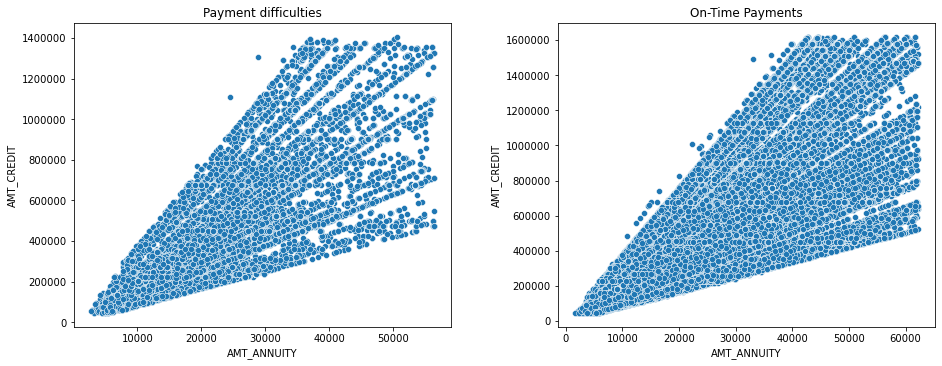

In [211]:
numerical_val_analisys(df0, df1, 'AMT_ANNUITY', 'AMT_CREDIT', corr_df0, corr_df1)



## Висновки ДЗ6 'AMT_ANNUITY', 'AMT_CREDIT'
 AMT_ANNUITY	Loan annuity (місячні платежі)
 
 AMT_CREDIT	Credit amount of the loan 

- Ми бачемо сильну позитивну кореляцію: зі збільшенням щомісячного платежа - зростає сума загального кредиту
 

Максимальне значення, після якого існують викиди для DAYS_EMPLOYED: 7184.5
Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0

People with payment difficulties
Outlier treshold for: DAYS_EMPLOYED max value: 7184.5, AMT_INCOME_TOTAL max value: 337500.0

Максимальне значення, після якого існують викиди для DAYS_EMPLOYED: 13734.5
Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0

People with on-time payments
Outlier treshold for: DAYS_EMPLOYED max value: 13734.5, AMT_INCOME_TOTAL max value: 337500.0

Correlation between AMT_ANNUITY and AMT_CREDIT df0:-0.1403924655915397
Correlation between AMT_ANNUITY and AMT_CREDIT df1:-0.014977396491471881


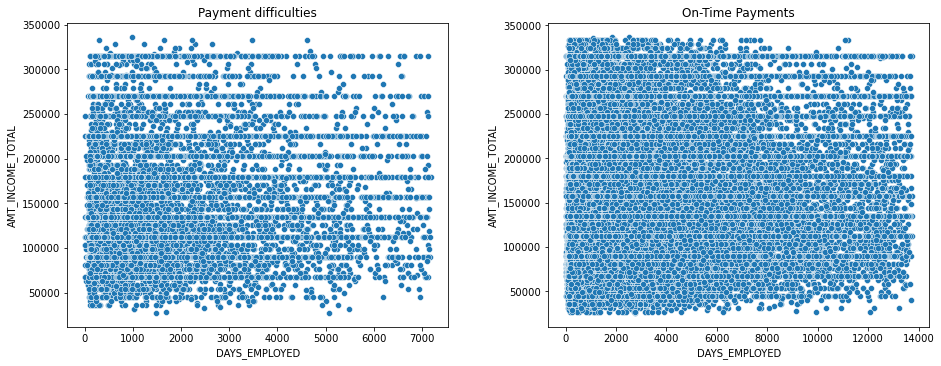

In [212]:
numerical_val_analisys(df0, df1, 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', corr_df0, corr_df1)

## Висновки ДЗ6 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL'
- на графіках майже відсутні кореляція між змінними к-ті днів робота та доходу
- але правий верхній кут (довго працює та має великий дохід) доволіі розріджений в обох випадках, особливо для людей з проблемами по кредиту
- також слабка кореляція має негативний знак, тобто чим більше дній днів працює на роботі - тим менший дохід. Але сама кореляція майже відсутня аби робити якісь більш серйозні висновки


Максимальне значення, після якого існують викиди для AMT_CREDIT: 1406688.75
Максимальне значення, після якого існують викиди для YEARS_BIRTH: 76.0

People with payment difficulties
Outlier treshold for: AMT_CREDIT max value: 1406688.75, YEARS_BIRTH max value: 76.0

Максимальне значення, після якого існують викиди для AMT_CREDIT: 1620000.0
Максимальне значення, після якого існують викиди для YEARS_BIRTH: 84.0

People with on-time payments
Outlier treshold for: AMT_CREDIT max value: 1620000.0, YEARS_BIRTH max value: 84.0

Correlation between AMT_ANNUITY and AMT_CREDIT df0:0.04742595853064907
Correlation between AMT_ANNUITY and AMT_CREDIT df1:0.13531807929482786


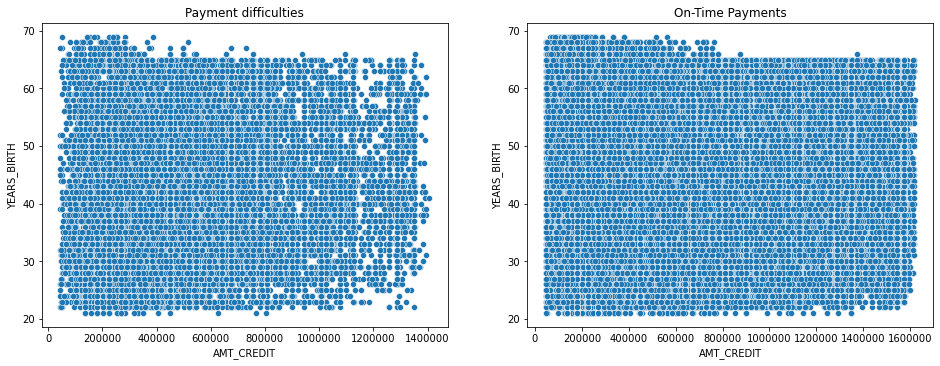

In [213]:
numerical_val_analisys(df0, df1, 'AMT_CREDIT', 'YEARS_BIRTH', corr_df0, corr_df1)

## Висновки ДЗ6 'AMT_CREDIT', 'YEARS_BIRTH'
- кореляція між місячним платежем та кількості років відсутня в обох випадках

## Неперервні та категоріальні змінні

In [214]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [215]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

Максимальне значення, після якого існують викиди для AMT_CREDIT: 1406688.75


1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [216]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

Максимальне значення, після якого існують викиди для AMT_CREDIT: 1620000.0


1620000.0

**Клієнт з платіжними труднощами**

In [217]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [218]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

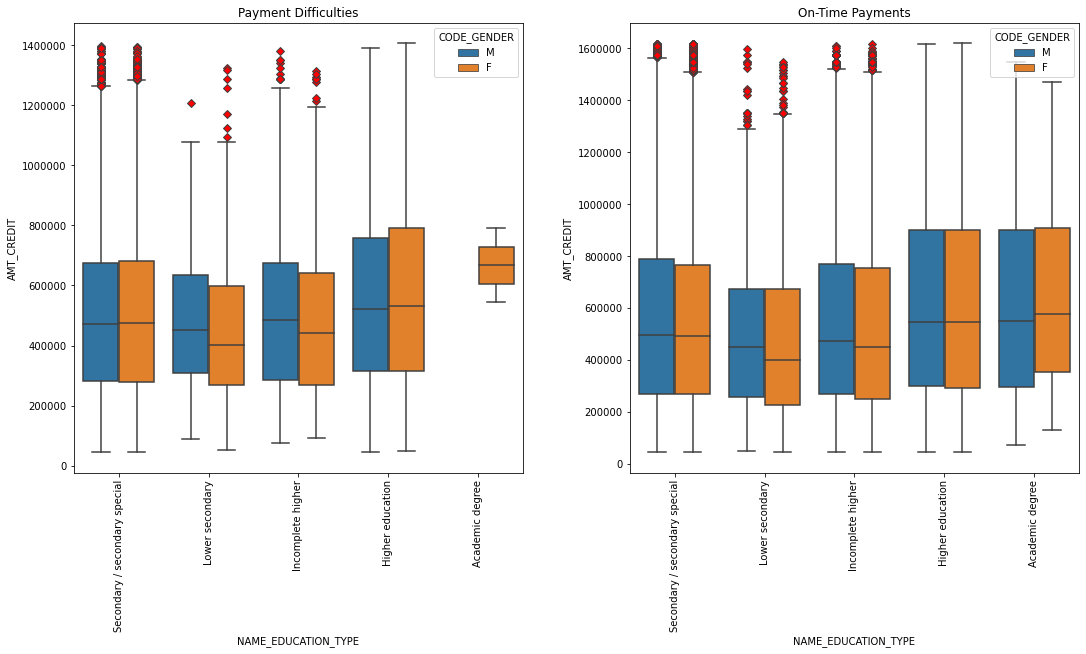

In [219]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

# ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [220]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  # Клієнт з платіжними труднощами

  display(df1.groupby(by = [column_2, column_3])[column_1].describe())

  # Клієнт зі своєчасними платежами

  display(df0.groupby(by = [column_2, column_3])[column_1].describe())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0
Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0


count      mean        std      min  \
NAME_FAMILY_STATUS   CODE_GENDER                                         
Civil marriage       F           1753.00 153620.72  101045.86 25650.00   
                     M           1208.00 173949.99   92449.17 36000.00   
Married              F           8324.00 159907.85 1283283.40 27000.00   
                     M           6526.00 182233.06   94787.77 31500.00   
Separated            F           1045.00 161159.55   82633.33 36000.00   
                     M            575.00 178888.28   85034.85 45000.00   
Single / not married F           2220.00 150373.57   76996.14 31500.00   
                     M           2237.00 166827.99   80471.61 40500.00   
Widow                F            828.00 141806.90   67647.06 28575.00   
                     M            109.00 145368.70   67543.57 45000.00   

                                       25%       50%       75%          max  
NAME_FAMILY_STATUS   CODE_GENDER                                             
Civil marriage       F           108000.00 135000.00 180000.00   3150000.00  
                     M           117000.00 157500.00 202500.00   1350000.00  
Married              F            90000.00 135000.00 180000.00 117000000.00  
                     M           126000.00 157500.00 225000.00   1890000.00  
Separated            F           112500.00 135000.00 202500.00    832500.00  
                     M           126000.00 157500.00 225000.00    675000.00  
Single / not married F           103500.00 135000.00 180000.00    810000.00  
                     M           112500.00 157500.00 202500.00    990000.00  
Widow                F            90000.00 130500.00 180000.00    540000.00  
                     M            90000.00 135000.00 180000.00    360000.00

count      mean       std      min  \
NAME_FAMILY_STATUS   CODE_GENDER                                          
Civil marriage       F            19017.00 162086.05 106811.49 27000.00   
                     M             7797.00 184126.29 106559.49 27000.00   
Married              F           114125.00 154289.53  88593.43 26100.00   
                     M            67459.00 199592.83 147599.76 27000.00   
Separated            F            14416.00 166374.21  94782.18 27000.00   
                     M             3734.00 191625.46 102991.28 32850.00   
Single / not married F            26364.00 160796.87  89306.04 25650.00   
                     M            14623.00 183592.86 117388.19 27000.00   
Widow                F            14360.00 142114.63  76227.05 26100.00   
                     M              791.00 160029.19  95460.17 28350.00   

                                       25%       50%       75%         max  
NAME_FAMILY_STATUS   CODE_GENDER                                            
Civil marriage       F           112500.00 135000.00 202500.00  9000000.00  
                     M           121500.00 157500.00 225000.00  3825000.00  
Married              F            94500.00 135000.00 180000.00  3600000.00  
                     M           135000.00 180000.00 225000.00 18000090.00  
Separated            F           112500.00 139500.00 202500.00  2250000.00  
                     M           135000.00 180000.00 225000.00  1235038.50  
Single / not married F           112500.00 135000.00 198000.00  2250000.00  
                     M           121500.00 157500.00 225000.00  4500000.00  
Widow                F            90000.00 126000.00 180000.00  1800000.00  
                     M            99000.00 135000.00 202500.00  1035000.00

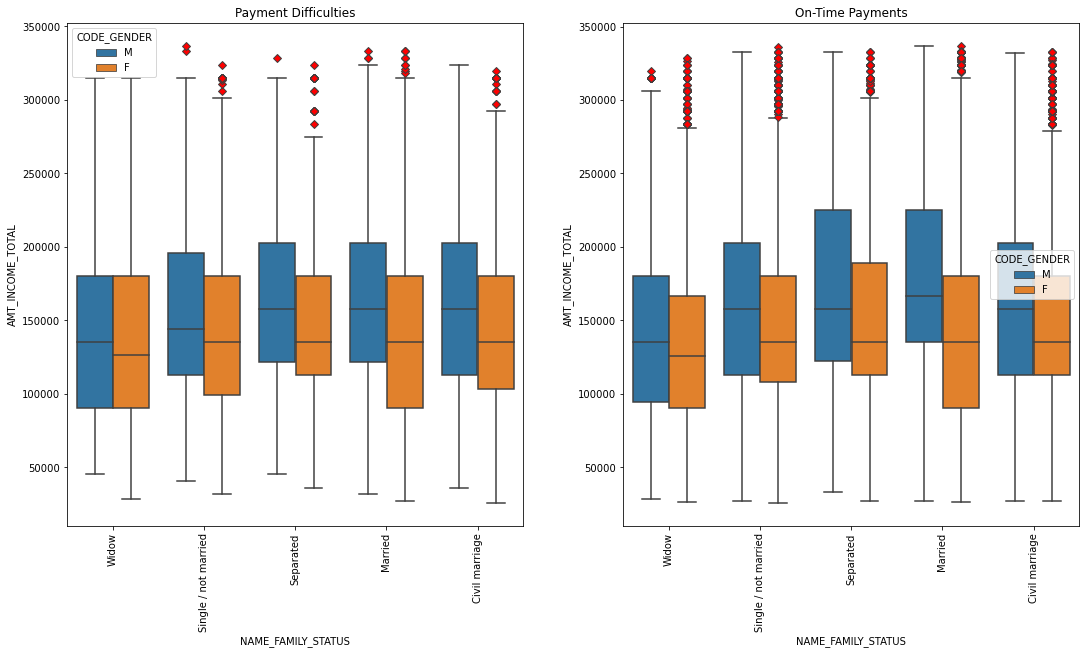

In [221]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

## Висновки ДЗ7 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER'
AMT_INCOME_TOTAL - Income of the client

NAME_FAMILY_STATUS- Family status of the client

- Ми можемо спостерігати що для групи людей які платять вчасно, значення медіани та 75-перуцентиля трохи вищі, ніж для тих хто має проблему з виплатами. Тобто дохід всіх груп які сплачують з затримкою трохи нижчий по всім категоріям.
- Також ми бачемо сильну різницю для групи людей в шлюбі та одиноких
    - В Шлюбі:
        - в жінок та чоловікив більший розрив по середньому дохід коли заявник НЕМАЄ проблем з виплатами ніж в порівнянні ситуаціями коли проблеми є
    - Одинокі:
        - схожа ситуація прослідковується в для людей без пари. Для чоловіків 75-перцентиль сильно завишений коли вони сплачують вчасно, ніж з тими хто має проблеми.
- Слід зазначити що чоловіки мають більший дохід по всім категоріям

**Висновок** 
Можна сказати що деякі комбінації сімейного стану, статі та доходу дійсно впливають на спроможність виплачувати кредит вчасно       

Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0
Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0


count      mean        std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       40.00 148628.70   59516.24   
                     House / apartment   4201.00 151897.22   70874.65   
                     Municipal apartment  153.00 153608.82   78282.79   
                     Office apartment      40.00 147375.00   50817.26   
                     Rented apartment     229.00 144210.10   59998.66   
                     With parents         930.00 143226.04   68189.31   
30-40                Co-op apartment       27.00 199515.00   96443.31   
                     House / apartment   6606.00 184272.70 1440563.87   
                     Municipal apartment  286.00 163485.31   85352.32   
                     Office apartment      61.00 180158.83   98569.05   
                     Rented apartment     227.00 165680.39   68067.23   
                     With parents         602.00 151128.93   68186.98   
40-50                Co-op apartment       11.00 199636.36   99046.48   
                     House / apartment   5168.00 171498.54   95432.67   
                     Municipal apartment  253.00 168851.38   93043.54   
                     Office apartment      34.00 177485.29   89673.44   
                     Rented apartment     101.00 178150.99  112880.24   
                     With parents         158.00 192001.90  128514.78   
50-60                Co-op apartment        8.00 172125.00   93615.76   
                     House / apartment   3791.00 161545.92   87107.33   
                     Municipal apartment  200.00 156792.15   79999.75   
                     Office apartment      22.00 154227.27   48925.53   
                     Rented apartment      38.00 160744.74   67767.05   
                     With parents          43.00 164040.70   86946.62   
60-70                Co-op apartment        3.00 180000.00   98075.23   
                     House / apartment   1506.00 134858.16   76293.59   
                     Municipal apartment   63.00 135271.43   61730.61   
                     Office apartment      15.00 128880.00   66263.12   
                     Rented apartment       6.00 108750.00   36298.76   
                     With parents           3.00 186000.00  132756.36   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     67500.00 110250.00 135000.00   
                     House / apartment   31500.00 112500.00 135000.00   
                     Municipal apartment 45000.00 108000.00 135000.00   
                     Office apartment    67500.00 112500.00 135000.00   
                     Rented apartment    45000.00  99000.00 135000.00   
                     With parents        27900.00  99000.00 135000.00   
30-40                Co-op apartment     81000.00 135000.00 157500.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 38250.00 112500.00 136125.00   
                     Office apartment    52438.50 130500.00 157500.00   
                     Rented apartment    36000.00 112500.00 157500.00   
                     With parents        40500.00 112500.00 135000.00   
40-50                Co-op apartment     58500.00 135000.00 180000.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 45000.00 112500.00 135000.00   
                     Office apartment    54000.00 112500.00 168750.00   
                     Rented apartment    40500.00 112500.00 157500.00   
                     With parents        45450.00 122625.00 157500.00   
50-60                Co-op apartment     54000.00 124875.00 146250.00   
                     House / apartment   25650.00 112500.00 135000.00   
                     Municipal apartment 36000.00  90000.00 135000.00   
                     Office

count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       298.00 161153.15  76171.26   
                     House / apartment   33165.00 163944.39  92313.18   
                     Municipal apartment  1099.00 166235.08  88698.47   
                     Office apartment      455.00 177960.18 115765.13   
                     Rented apartment     1535.00 153028.06  70748.99   
                     With parents         6724.00 151305.61  90033.83   
30-40                Co-op apartment       308.00 167912.96  82059.39   
                     House / apartment   65237.00 179666.42 117552.25   
                     Municipal apartment  2507.00 181264.34  95937.44   
                     Office apartment      811.00 204007.25 111420.44   
                     Rented apartment     1521.00 174223.96  91030.95   
                     With parents         4577.00 167755.49  90583.95   
40-50                Co-op apartment       232.00 182802.80  97705.04   
                     House / apartment   64038.00 181200.92 131158.99   
                     Municipal apartment  2818.00 178119.98 113841.18   
                     Office apartment      578.00 206282.23 120775.57   
                     Rented apartment      775.00 187331.53 103960.04   
                     With parents         1343.00 173484.90  94722.97   
50-60                Co-op apartment       134.00 168991.79  79466.84   
                     House / apartment   59896.00 164136.97 104934.64   
                     Municipal apartment  2683.00 160794.21  92624.88   
                     Office apartment      419.00 168407.94 134101.34   
                     Rented apartment      340.00 180109.85 117146.79   
                     With parents          381.00 165480.01  83044.86   
60-70                Co-op apartment        61.00 128913.93  78766.44   
                     House / apartment   29260.00 137613.63  76318.52   
                     Municipal apartment  1121.00 138664.51  73515.98   
                     Office apartment      182.00 149946.26  88270.46   
                     Rented apartment      109.00 143795.31 105190.65   
                     With parents           79.00 139494.30  74425.16   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 139500.00   
                     House / apartment   27000.00 112500.00 141264.00   
                     Municipal apartment 45000.00 112500.00 144000.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    29250.00 109125.00 135000.00   
                     With parents        27000.00 108000.00 135000.00   
30-40                Co-op apartment     49500.00 112500.00 148500.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 29250.00 112500.00 157500.00   
                     Office apartment    45000.00 135000.00 180000.00   
                     Rented apartment    36000.00 112500.00 157500.00   
                     With parents        27000.00 112500.00 144000.00   
40-50                Co-op apartment     45000.00 112500.00 166500.00   
                     House / apartment   26550.00 112500.00 157500.00   
                     Municipal apartment 31500.00 112500.00 157500.00   
                     Office apartment    27967.50 135000.00 180000.00   
                     Rented apartment    45000.00 112500.00 157500.00   
                     With parents        25650.00 112500.00 157500.00   
50-60                Co-op apartment     45000.00 112500.00 157500.00   
                     House / apartment   26100.00 108000.00 135000.00   
                     Municipal apartment 29700.00 103500.00 135000.00   
                     Office 

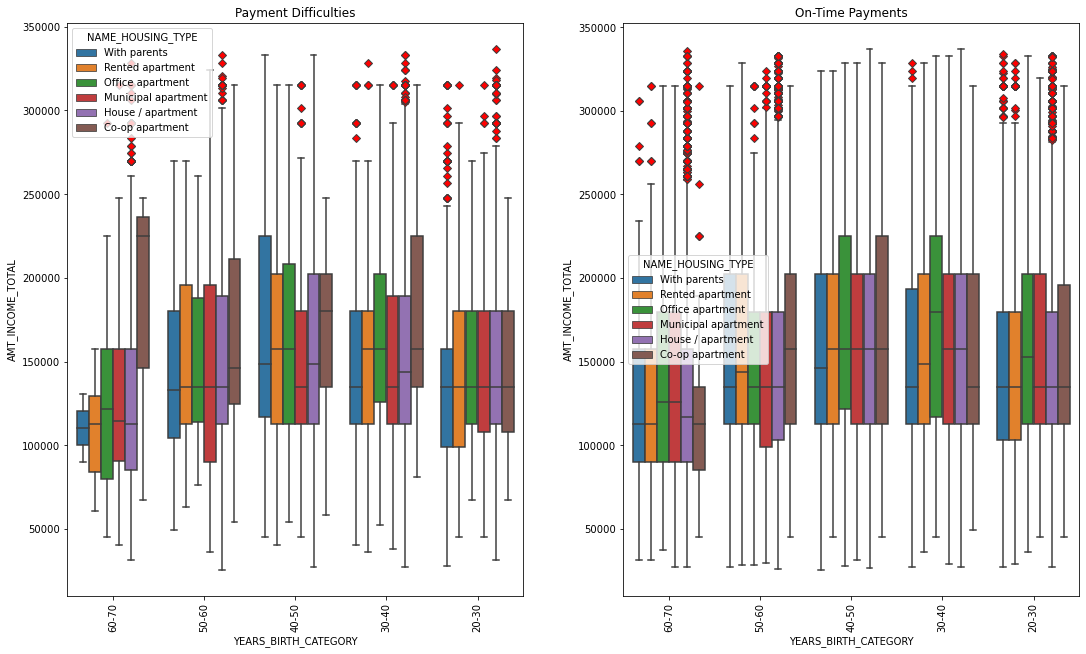

In [222]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')


## Висновки ДЗ7 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE'
AMT_INCOME_TOTAL - Income of the client

NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

- Одразу можна звернути увагу на людей 60-70 які, бо в цій групі помітні найбільше відміностей
    - co-op apartment: Для цієї вікової групи ми можемо чітко відділити людей в яких будуть проблеми з кредитом і в якиї не буде на основі їх доходу. 75 перцентиль для людей БЕЗ проблем закінчується на 140к, тоді як 25-перцентиль з проблемами починається в районі 145к. 
    - with parents: для цієї групи дохід має значно менший розкид та більш щільно концентрований довколо 110к, тоді як для тих хто немає проблем з виплатами - більш широкий спект доходів аж до 150к
- Також вирізняється вікова група 30-40 для  co-op apartment - ця колонка більше зсунута вгору та люди які мають більшу запалату в цій категорії частіше стиаються з фінансовими проблемими.
- Сходо ситуація для 40-50 групи та які живуть with parents та мають визі (зміщені вгору) доходи у випадках проблем по кредиту 

**Висновок** 
Ми можемо сказати що комбінація тих трьох категорій вказує на важливість в заявці віку, доходу та типу житла. Та їх було б корисно використати для прогнозування проблем з поверненням кредиту

Максимальне значення, після якого існують викиди для AMT_GOODS_PRICE: 1329750.0
Максимальне значення, після якого існують викиди для AMT_GOODS_PRICE: 1354755.9375


count      mean       std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F           2968.00 536304.02 353598.52  45000.00   
                     M           2392.00 526355.38 335793.33  45000.00   
Maternity leave      F              2.00 929250.00 715945.62 423000.00   
Pensioner            F           2243.00 494976.12 316903.86  45000.00   
                     M            739.00 486543.08 321104.43  45000.00   
State servant        F            847.00 544120.88 336074.93  45000.00   
                     M            402.00 536955.22 339694.98  45000.00   
Unemployed           F              6.00 653250.00 321180.44 328500.00   
                     M              2.00 546750.00  54093.67 508500.00   
Working              F           8104.00 470537.11 297631.23  45000.00   
                     M           7120.00 466364.04 286862.45  45000.00   

                                       25%       50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F           270000.00 450000.00  675000.00 3600000.00  
                     M           270000.00 450000.00  675000.00 2961000.00  
Maternity leave      F           676125.00 929250.00 1182375.00 1435500.00  
Pensioner            F           229500.00 450000.00  675000.00 2173500.00  
                     M           229500.00 450000.00  675000.00 1800000.00  
State servant        F           270000.00 450000.00  675000.00 1800000.00  
                     M           270000.00 450000.00  675000.00 1980000.00  
Unemployed           F           433125.00 603000.00  745875.00 1215000.00  
                     M           527625.00 546750.00  565875.00  585000.00  
Working              F           229500.00 450000.00  675000.00 2254500.00  
                     M           238500.00 450000.00  652500.00 2250000.00

count       mean        std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Businessman          F               3.00 1125000.00 1031079.53 225000.00   
                     M               7.00 1272857.14  755104.06 495000.00   
Commercial associate F           41552.00  602132.71  400701.09  45000.00   
                     M           24705.00  620123.74  422345.24  45000.00   
Maternity leave      F               2.00  562500.00  350017.86 315000.00   
                     M               1.00  765000.00        NaN 765000.00   
Pensioner            F           43018.00  481967.35  342759.14  45000.00   
                     M            9362.00  515007.29  372967.10  45000.00   
State servant        F           15009.00  597592.88  399672.12  45000.00   
                     M            5445.00  629000.43  439320.99  45000.00   
Student              F               7.00  338142.86  167297.32 180000.00   
                     M              11.00  534681.82  280951.53  90000.00   
Unemployed           F              11.00  787909.09  510298.63 135000.00   
                     M               3.00 1045500.00  291853.13 855000.00   
Working              F           88680.00  519293.29  349773.59  45000.00   
                     M           54870.00  528999.09  359956.40  40500.00   

                                       25%        50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F           562500.00  900000.00 1575000.00 2250000.00  
                     M           607500.00 1350000.00 1800000.00 2250000.00  
Commercial associate F           270000.00  472500.00  837000.00 4050000.00  
                     M           270000.00  472500.00  900000.00 4050000.00  
Maternity leave      F           438750.00  562500.00  686250.00  810000.00  
                     M           765000.00  765000.00  765000.00  765000.00  
Pensioner            F           225000.00  450000.00  675000.00 3150000.00  
                     M           225000.00  450000.00  675000.00 2250000.00  
State servant        F           270000.00  472500.00  819000.00 2700000.00  
                     M           270000.00  472500.00  900000.00 3600000.00  
Student              F           209250.00  238500.00  472500.00  585000.00  
                     M           411750.00  468000.00  654750.00 1206000.00  
Unemployed           F           510750.00  634500.00  983250.00 1804500.00  
                     M           877500.00  900000.00 1140750.00 1381500.00  
Working              F           234000.00  450000.00  679500.00 2700000.00  
                     M           238500.00  450000.00  679500.00 3712500.00

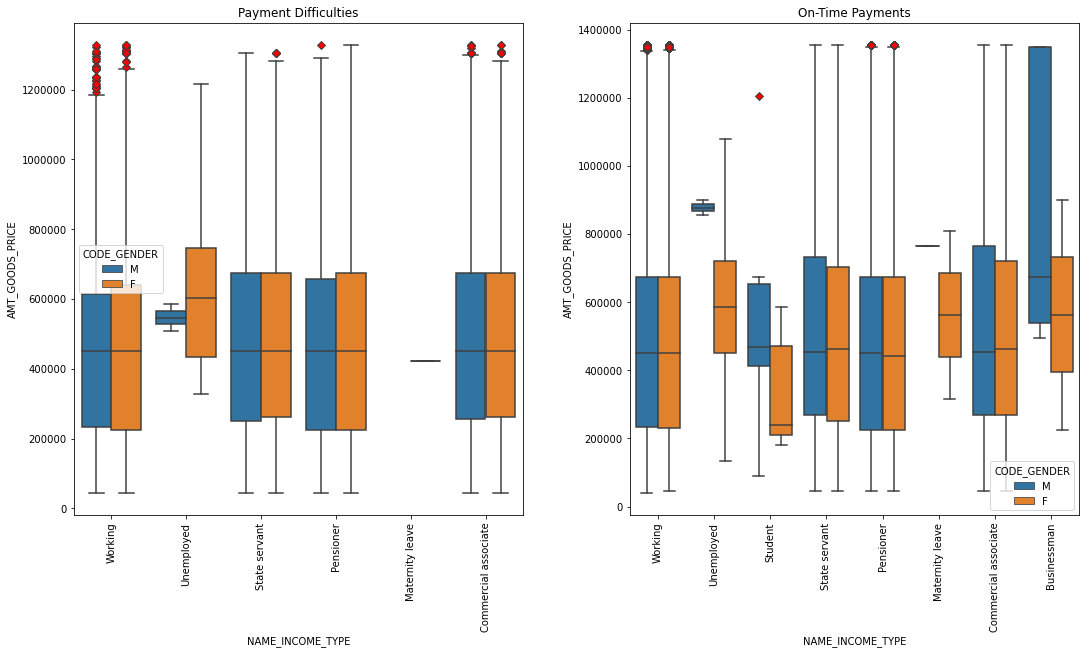

In [223]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')


## Висновки ДЗ7 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER'
NAME_INCOME_TYPE	Clients income type (businessman, working, maternity leave,...)

AMT_GOODS_PRICE	For consumer loans it is the price of the goods for which the loan is given

- Перш за все Струденти та Бізнесмени завжди повертають кредити без пробелм.
    - також для цих двох категорії виразно видно різницю в ціни на яку купляють товари. Жінки витрачають значно менше нід чоловіки для цих груп
- Чоловіки в декреті так само завжди повертають кредити, але жінки в декреті дуже рідко мають проблеми зі сплатою.
- Варто зазначити ситуацію з Безробітніми. Ми можемо чітко розмежувати що якщо безробітній чоловік взяв кредит на суму около 550к, то він точно буде мати проблеми з поверненням кредиту. Тоді як чоловіки які беруть крудит на суму 700к - завжди його певертають. Боксплоти цих двох груп ніяким чинок не пересікаються. При тому ця тенденція не розповсюджеється на безробіних жінок. В них сума покупки приблизно однакова.
- по іншим групах на переший погляд немає критичних відміностей

**Висновок** 
- ціна на товар тип зайнятості та стать є важливими факторами для визначення кліента з проблемами з виплатами

Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0
Максимальне значення, після якого існують викиди для AMT_INCOME_TOTAL: 337500.0


count      mean        std       min  \
OCCUPATION_TYPE       CODE_GENDER                                          
Accountants           F            457.00 174840.64   79021.04  54000.00   
                      M             17.00 202367.65   98623.66  81000.00   
Cleaning staff        F            410.00 128907.99   70328.23  31500.00   
                      M             37.00 119493.24   45786.21  45000.00   
Cooking staff         F            555.00 129298.38   55531.88  32400.00   
                      M             66.00 177136.36   70219.69  54000.00   
Core staff            F           1300.00 151346.91   82703.03  27900.00   
                      M            438.00 186997.33  105677.70  54000.00   
Drivers               F             78.00 171721.15   87317.36  45000.00   
                      M           2029.00 180610.43   78388.18  45000.00   
HR staff              F             33.00 185659.09   82903.65  81000.00   
                      M              3.00 220500.00   93638.93 112500.00   
High skill tech staff F            465.00 155056.60   95571.63  54000.00   
                      M            236.00 203694.25   92743.72  71154.00   
IT staff              F             10.00 184950.00   88269.62  99000.00   
                      M             24.00 167625.00   81770.79  67500.00   
Laborers              F           2065.00 198925.03 2572298.73  36000.00   
                      M           3773.00 169451.69   71865.63  36000.00   
Low-skill Laborers    F             49.00 124147.65   54090.78  45000.00   
                      M            310.00 133051.94   51390.50  36000.00   
Managers              F            639.00 228765.27  139415.85  27000.00   
                      M            689.00 278625.67  169183.71  45000.00   
Medicine staff        F            548.00 139739.24   71621.37  31500.00   
                      M             24.00 146250.00   53294.30  54000.00   
Private service staff F            167.00 182489.82  239213.84  67500.00   
                      M              8.00 181687.50   70083.59 135000.00   
Realty agents         F             48.00 183750.00   78790.79  76500.00   
                      M             11.00 187363.64   47507.42 112500.00   
Sales staff           F           2730.00 144078.15   64787.43  36000.00   
                      M            362.00 180009.94   84624.11  63000.00   
Secretaries           F             84.00 147745.93   65107.30  45000.00   
                      M              8.00 189000.00   81320.79  81000.00   
Security staff        F            197.00 137948.98   82669.92  36000.00   
                      M            525.00 145897.82   62314.17  40500.00   
Unknown               F           4199.00 141580.23   73542.33  25650.00   
                      M           2079.00 165932.96   83696.28  31500.00   
Waiters/barmen staff  F            136.00 139387.50   59729.86  36000.00   
                      M             16.00 173812.50   70996.92  67500.00   

                                        25%       50%       75%          max  
OCCUPATION_TYPE       CODE_GENDER                                             
Accountants           F           112500.00 157500.00 202500.00    540000.00  
                      M           121500.00 180000.00 252000.00    438750.00  
Cleaning staff        F            90000.00 112500.00 157500.00    720000.00  
                      M            90000.00 112500.00 135000.00    247500.00  
Cooking staff         F            90000.00 112500.00 157500.00    405000.00  
                      M           135000.00 157500.00 202500.00    405000.00  
Core staff            F            99000.00 135000.00 180000.00   1305000.00  
                      M           135000.00 161325.00 214875.00   1350000.00  
Drivers               F           112500.00 157500.00 212625.00    450000.00  
                      M           135000.00 166500.00 225000.00   1350000.00  
HR staff              F           135000.00 157

count      mean       std      min  \
OCCUPATION_TYPE       CODE_GENDER                                         
Accountants           F            9072.00 194324.51 109135.61 27000.00   
                      M             267.00 236490.89 131795.33 54000.00   
Cleaning staff        F            3904.00 130602.05  63495.05 25650.00   
                      M             302.00 137172.52  64373.09 31500.00   
Cooking staff         F            4830.00 134460.40  60213.56 27000.00   
                      M             495.00 181838.97  74088.22 54000.00   
Core staff            F           20482.00 162796.77  89035.64 27000.00   
                      M            5350.00 214408.58 120326.37 31500.00   
Drivers               F             847.00 168866.16  83469.45 38250.00   
                      M           15649.00 188899.90  82891.66 27000.00   
HR staff              F             491.00 185297.59  90472.03 54000.00   
                      M              36.00 238625.00 123061.66 30600.00   
High skill tech staff F            6885.00 164678.06  80316.22 27000.00   
                      M            3794.00 217912.73 110331.98 37800.00   
IT staff              F             148.00 185232.16 185029.32 45000.00   
                      M             344.00 229639.67 121511.95 54000.00   
Laborers              F           21074.00 146162.55  67123.14 27000.00   
                      M           28274.00 178618.27  92253.88 31500.00   
Low-skill Laborers    F             272.00 121574.45  52613.97 29250.00   
                      M            1462.00 135737.77  54529.23 27000.00   
Managers              F           10954.00 229658.75 160076.44 29250.00   
                      M            9089.00 298142.72 208214.89 38250.00   
Medicine staff        F            7749.00 149784.43  73765.45 26550.00   
                      M             216.00 172706.25  87416.49 54000.00   
Private service staff F            2371.00 180824.81  87603.88 36000.00   
                      M             106.00 215915.09 108765.11 40500.00   
Realty agents         F             641.00 195139.24  84580.66 67500.00   
                      M              51.00 205544.12  72196.36 67500.00   
Sales staff           F           25543.00 147208.55  73649.40 27000.00   
                      M            3467.00 193418.53  98770.87 31500.00   
Secretaries           F            1163.00 156755.77 107304.36 45000.00   
                      M              50.00 265545.00 245659.97 81000.00   
Security staff        F            1841.00 134899.15  64869.02 27000.00   
                      M            4158.00 157229.76  70705.77 29250.00   
Unknown               F           68969.00 145563.53  83300.88 26100.00   
                      M           21144.00 180605.51 186925.80 27000.00   
Waiters/barmen staff  F            1046.00 137314.76  60954.02 29250.00   
                      M             150.00 194070.00  88971.12 67500.00   

                                        25%       50%       75%         max  
OCCUPATION_TYPE       CODE_GENDER                                            
Accountants           F           130500.00 175500.00 225000.00  2214117.00  
                      M           141750.00 216000.00 270000.00  1035000.00  
Cleaning staff        F            90000.00 112500.00 157500.00  1080000.00  
                      M            90000.00 132750.00 169875.00   450000.00  
Cooking staff         F            90000.00 121500.00 157500.00   540000.00  
                      M           135000.00 180000.00 225000.00   540000.00  
Core staff            F           112500.00 135000.00 202500.00  3375000.00  
                      M           135000.00 180000.00 256500.00  3600000.00  
Drivers               F           112500.00 157500.00 202500.00   675000.00  
                      M           135000.00 180000.00 225000.00  2475000.00  
HR staff              F           130500.00 157500.00 216000.00   699750.00  
                      

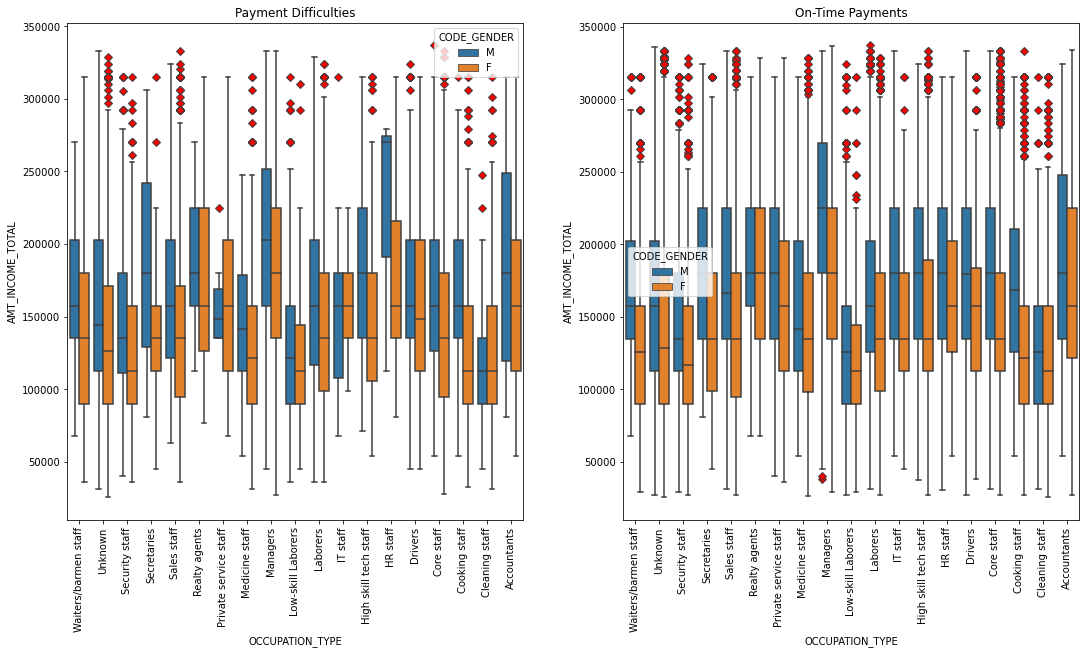

In [224]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE','CODE_GENDER')

## Висновки ДЗ7 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE','CODE_GENDER'
AMT_INCOME_TOTAL - Income of the client

- Необхідно звернути увагу на категорію HR чоловіків. 50перцентиль сильно зсунуто до гори (відносно заробітку людини), коли вона МАЄ проблеми з певерненням кредиту. Середне значення для них в районі 270к, тоді як середне значення для чоловіків БЕЗ проблем з кредитом становить 170к
- Можна прослідкувати тенденцію що жінки в усіх категорія заробляють менше в порівнянні з чоловіками, окрім ситуації з private service staff з проблемами по кредиту. В цій ситуації дохід жінок значно розрідженіший ніж чоловіків. 

**Висновок** 
комбінація цих факторів інформативна для подальщошо аналізу

## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


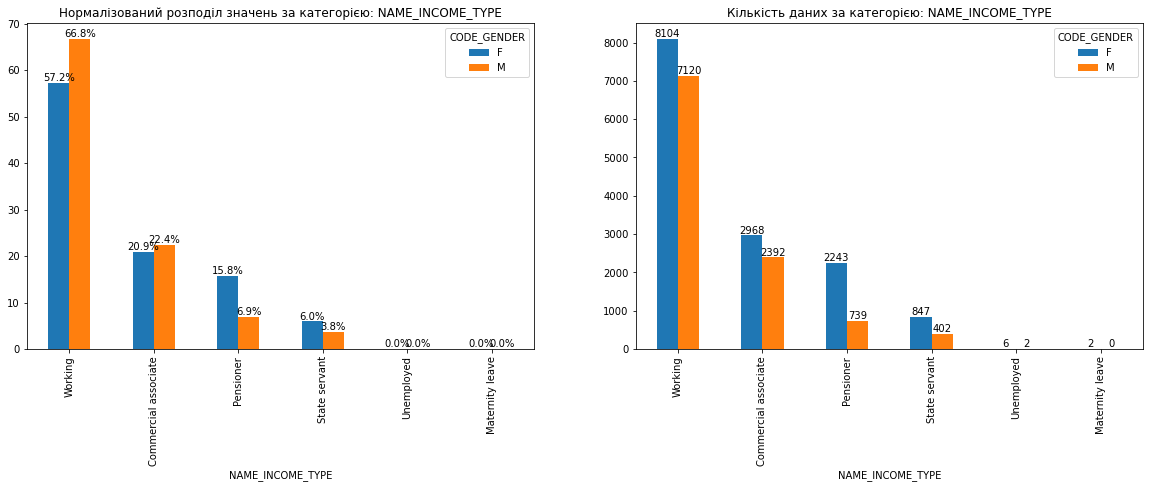

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


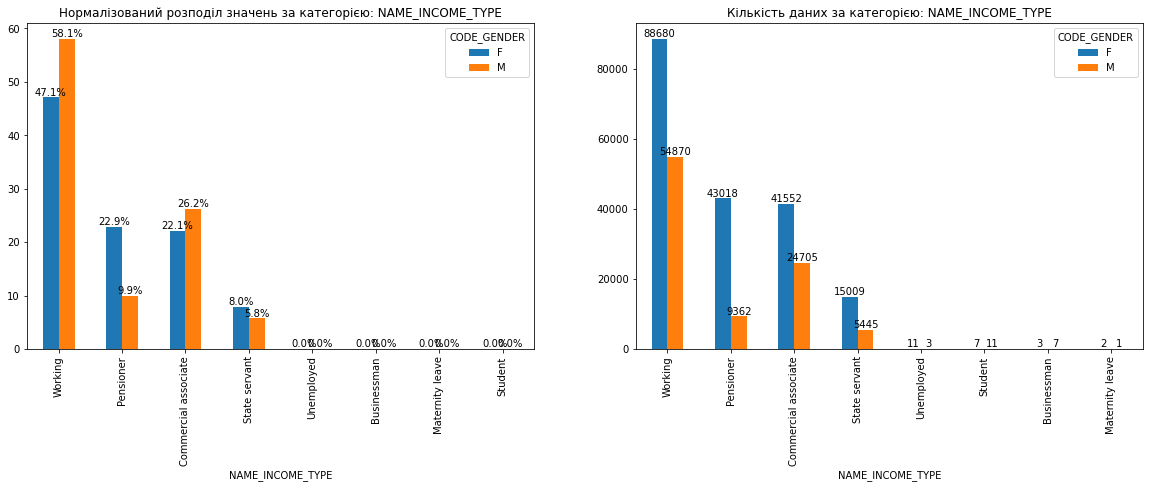

In [225]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


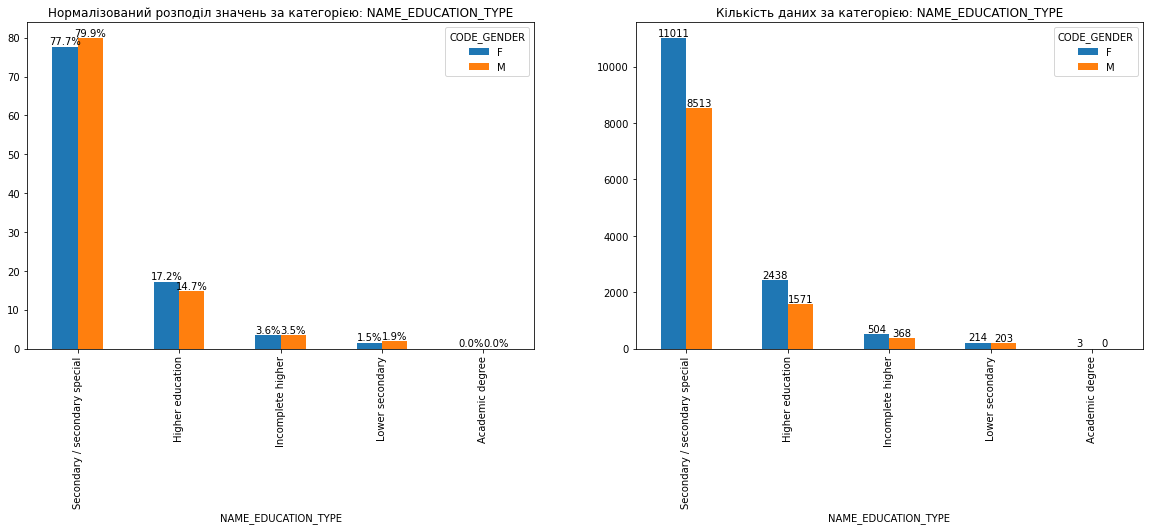

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


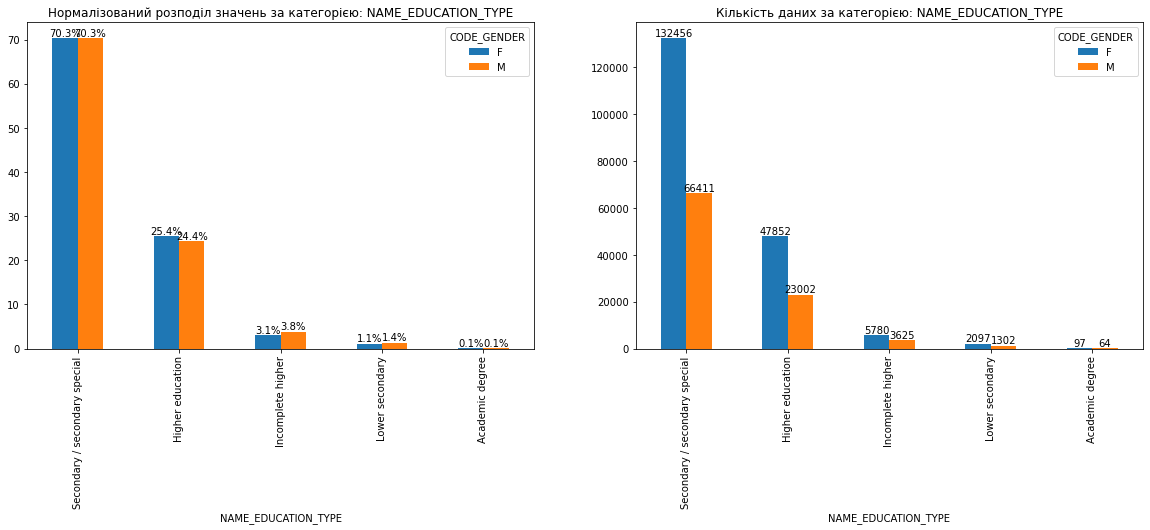

In [226]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')


## Висновки ДЗ8 'NAME_EDUCATION_TYPE','CODE_GENDER'

- Чоловіки та жінки з secondary special мають частіше проблеми з погашенням кредита (80% та 78%) а порівнянні з тими хто платить вчасно (70% та 70%)
- Чоловіки та жінки з higher education частіше сплачують кредити без проблем (25% та 24%)
- Для людей з академічною освітою, лише декілька жінок мають пробелими з кредитами.
Інші групи людей показують однакову поведінку 

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


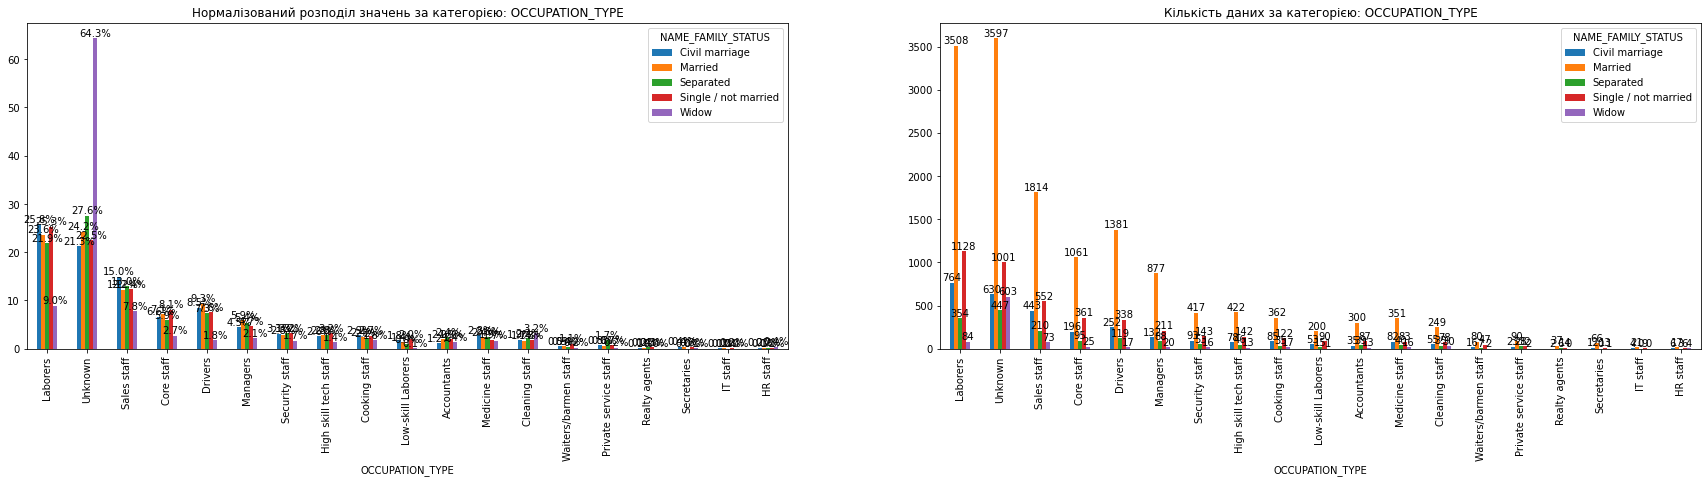

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


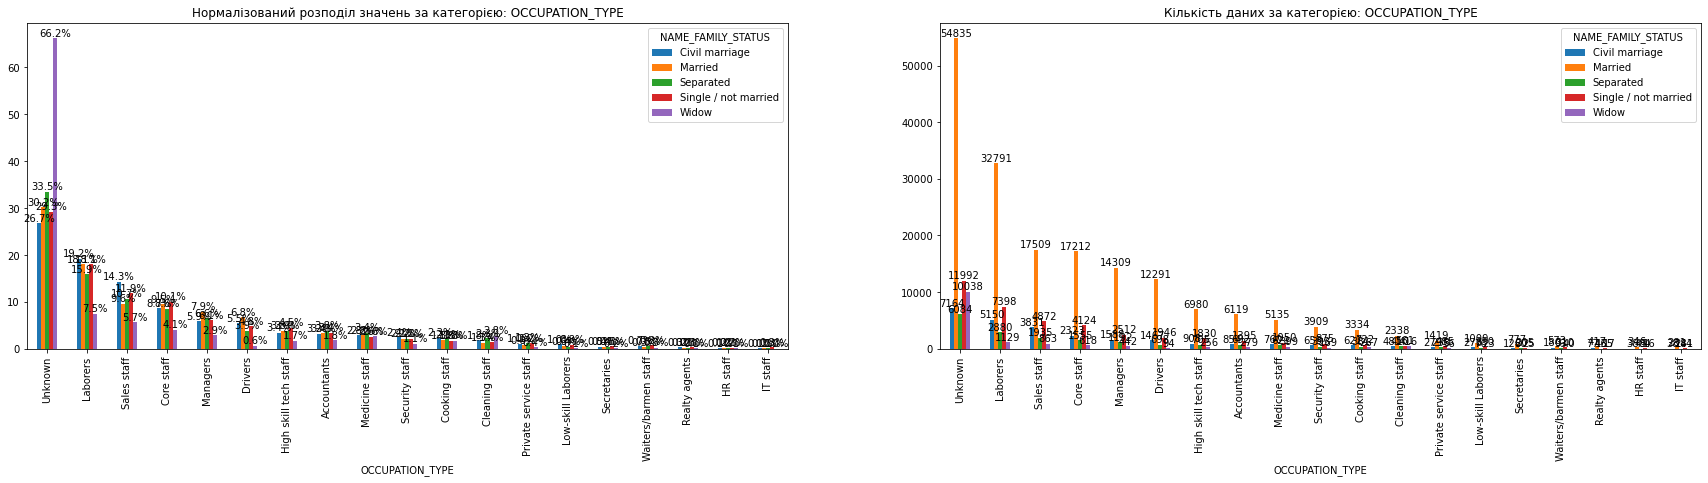

In [227]:
# додамо додатковий параметр size в фенкцію ,який по дефолту буде 20, але ми зможемо його змінювати при необхідності
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 30) 


## Висновки ДЗ8 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS'

- Є велика різниця в Labores для всіх сімейних стасусів, що вони частіше мають проблеми з погащенням кредиту
- також для Невідомої категорії роботи: одинокі люди, у шлюбі, та цивільні партнери незначною мірою частіше немають проблем з погашенням кредиту ніж мають

- Також найбільша часті людей які мають проблеми з погащенням кредиту - це Labores, тоді як найбільша частка тизх які НЕ мають проблем - це unknown

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


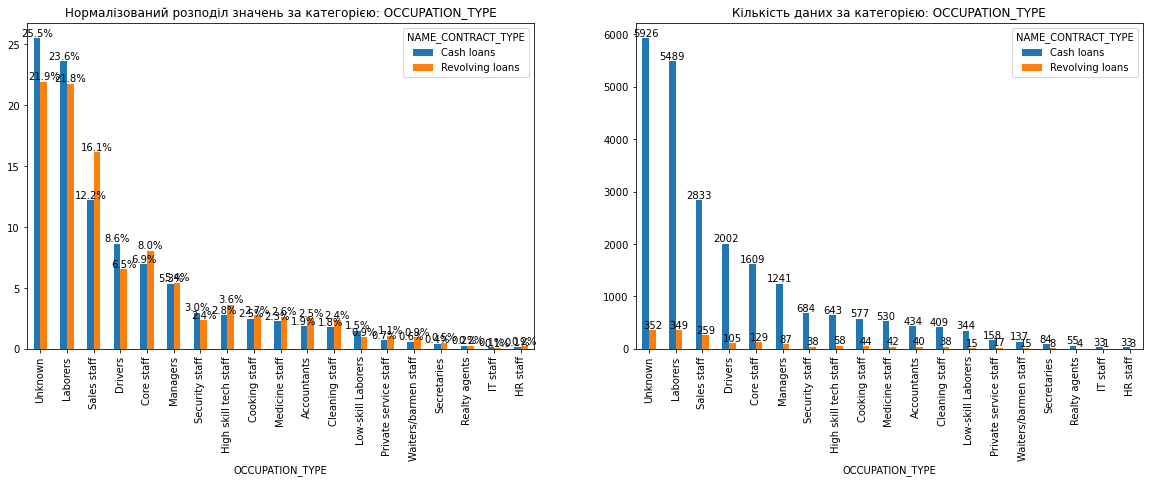

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


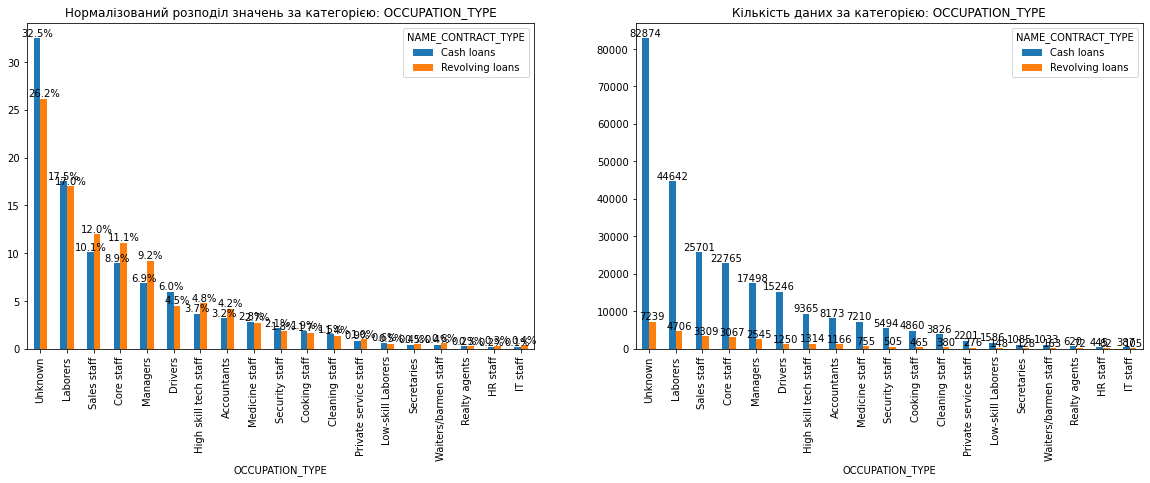

In [ ]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE')

## Висновки ДЗ8 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE'

- Невідома категорія працівників частіше не має ніж має проблеми з погашенняям для будь-якого тиипу контракта
- Ми також маємо різне співвідношення між типом роботи та типом контракта відносно проблем з кредитом\вчасною сплатою
    - наприклад Водії мають частіше проблеми з виплатами та ті хто маюбть проблеми віддають перевагу кеш коредитам (тоді як ті хто не мають проблем частіше беруть revolving)
- Як і в попередньому випадку Labores частіше мають ніж не мають проблеми з погашенням кредиту (23% проти 17%)
- також sale staff частіше мають проблеми якщо беруть кредит  revolving
- Менеджери частіше Не мать проблем ніж мають по кредитам revolving

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

Для початку приведемо всі висновки які були зроблені по ходу роботи в єдине місця та розсортуємо їх

### Структурована таблиця висновків

| **Категорія**|**Висновок** |**ДЗ**|
|--------------|-------------|------|
|NAME_INCOME_TYPE|Люди категорії *working* частіше мають проблеми з поверненням кредиту|ДЗ4|
|NAME_INCOME_TYPE|Студенти та бізнесмени завжди повертають кредит без проблем| ДЗ4, ДЗ7|
|NAME_INCOME_TYPE| Люди в декреті майже завжди повертають кредити|ДЗ7|
|--------------|-------------|------|
|NAME_EDUCATION_TYPE|Люди з *secondary special* частіше мають проблеми з погашенням кредиту|ДЗ4, ДЗ8|
|NAME_EDUCATION_TYPE|Люди з академічгною освітою майже завжди повертають кредит вчасно|ДЗ8|
|NAME_EDUCATION_TYPE| Чоловіки та жінки з вищою освітою значно рідше мають проблеми з кредитами|ДЗ8|
|--------------|-------------|------|
|NAME_FAMILY_STATUS|Люди у шлюбі частіше сплачують вчасно.|ДЗ4, ДЗ7|
|NAME_FAMILY_STATUS|Одинокі люди або ті, хто живуть у цивільному шлюбі, частіше мають проблеми з погашенням кредиту|ДЗ4, ДЗ7|
|--------------|-------------|------|
|YEARS_BIRTH_CATEGORY| Люди віком 20–40 років частіше мають проблеми з кредитами|ДЗ5|
|YEARS_BIRTH_CATEGORY| Люди віком від 50–60 років рідше мають проблема з погашенням кредиту|ДЗ5|
|--------------|-------------|------|
|OCCUPATION_TYPE| Менеджери та клієнти з невідомою професією частіше виплачують кредити вчасно|ДЗ8|
|OCCUPATION_TYPE| Категорія *Labores* найчастіше має проблеми з кредитами серед усіх категорій|ДЗ8|
|--------------|-------------|------|
|--------------|-------------|------|
|CODE_GENDER |Чоловіки частіше мають проблеми з поверненням кредиту, ніж жінки|ДЗ4|
|FLAG_OWN_CAR|Власники автомобілів рідше мають проблеми з поверненням кредиту|ДЗ4|
|AMT_GOODS_PRICE| Для товарів ціною >500к клієнти частіше виплачують кредити вчасно|ДЗ5, ДЗ7|
|DAYS_EMPLOYED| Люди, які працюють менше 2000 днів, частіше мають проблеми з кредитами. Зі збільшенням стажу частка людей без проблем зростає.|ДЗ5|
|AMT_CREDIT|Для AMT_CREDIT > 750000 більше клієнтів, які вчасно здійснюють платежі|лекція дз5|
|NAME_HOUSING_TYPE| У віковій групі 60–70 років тип житла *co-op apartment* чстіше мають проблеми х кредитом якщо сума вище нза 150к|ДЗ7|

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту
 - віддавати перевагу жінкам а не чоловікам, якщо в нас немає додаткових критеріїв
 - Люди з академічною освітою 
 - Бізнесмени, особливо коли мова йде про великі кредити від 600к (що притаманіше чоловікам)
 - люди у шлюбі більш *стабільніші* за людей без пари
 - люди старшої групи за 40, та які мають великий досвід роботи (більше 2000 днів)
 - НЕ довіряти HR чоловіки чий дохід більше ніж на 220к 

*Примітка* - ми знаємо що студенти завжди сплачують кредити без проблем, але я б не включала цю категорію до тих яким можна *довіряти*. Бо можливо таке що студентам в приниці складніщше отримати кредит та їм треба краше доводити свою платеспроможність, тому в нашій вибірці всі студенти сплтили кредит - то були дуже ретельно відібрані працівниками банку (ретельніше ніж перевірка для інших категорії).